In [1]:
import pandas as pd
import networkx as nx
import itertools

In [187]:
excel_file = '19th_century_translations.xlsx'
df = pd.read_excel(excel_file)

In [207]:
filtered_df = df.iloc[0:179]

In [208]:
filtered_df

,Year,Earlier,Subsequent Listing,Number of Editions,Digitised,Database Link,Edition,Author,Gender,Religious Au,...,Approbation,End Matter,Images,Notes,Full Title,Place of Publication,Source Lg.,Original - Title,Original - Pub. Place,Original - Year
0,1846,NaN,NaN,1.0,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1787",male,Yes (Saint),...,NaN,NaN,NaN,NaN,NaN,Dublin,Italian,NaN,NaN,NaN
1,1853,NaN,NaN,1.0,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1787",male,Yes (Saint),...,NaN,NaN,NaN,Worldcat,NaN,Dublin,NaN,NaN,NaN,NaN
2,1873,NaN,NaN,1.0,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1787",male,Yes (Saint),...,NaN,NaN,NaN,Worldcat,NaN,Dublin,NaN,NaN,NaN,NaN
3,1859,NaN,NaN,1.0,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1787",male,Yes (Saint),...,NaN,NaN,NaN,Worldcat,NaN,New York; Montreal,NaN,NaN,NaN,NaN
4,1872,NaN,NaN,1.0,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1787",male,Yes (Saint),...,NaN,NaN,NaN,Worldcat,NaN,Einsiedeln,NaN,Esercizio della via crucis,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1845,NaN,NaN,NaN,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1805",male,yes (Priest),...,NaN,NaN,NaN,All works had been published separately in the...,NaN,Dublin,NaN,NaN,NaN,NaN
175,1888,NaN,NaN,NaN,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1806",male,yes (Priest),...,NaN,NaN,NaN,Worldcat,NaN,New York,NaN,NaN,NaN,NaN
176,1852,NaN,NaN,NaN,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1808",male,yes (Priest),...,NaN,NaN,frontispiece portrait,Worldcat,NaN,Baltimore; Pittsburg,NaN,NaN,NaN,NaN
177,1872,NaN,NaN,NaN,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1809",male,yes (Priest),...,NaN,NaN,NaN,Worldcat,NaN,New York,NaN,NaN,NaN,NaN


In [91]:
df

,Year,Earlier,Subsequent Listing,Number of Editions,Digitised,Database Link,Edition,Author,Gender,Religious Au,...,Approbation,End Matter,Images,Notes,Full Title,Place of Publication,Source Lg.,Original - Title,Original - Pub. Place,Original - Year
0,1846,NaN,NaN,1.0,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1787",male,Yes (Saint),...,NaN,NaN,NaN,NaN,NaN,Dublin,Italian,NaN,NaN,NaN
1,1853,NaN,NaN,1.0,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1787",male,Yes (Saint),...,NaN,NaN,NaN,Worldcat,NaN,Dublin,NaN,NaN,NaN,NaN
2,1873,NaN,NaN,1.0,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1787",male,Yes (Saint),...,NaN,NaN,NaN,Worldcat,NaN,Dublin,NaN,NaN,NaN,NaN
3,1859,NaN,NaN,1.0,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1787",male,Yes (Saint),...,NaN,NaN,NaN,Worldcat,NaN,New York; Montreal,NaN,NaN,NaN,NaN
4,1872,NaN,NaN,1.0,NaN,NaN,NaN,"Liguori, Alfonso Maria de', Saint, 1696-1787",male,Yes (Saint),...,NaN,NaN,NaN,Worldcat,NaN,Einsiedeln,NaN,Esercizio della via crucis,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,1856,NaN,NaN,NaN,https://www.google.ie/books/edition/Nine_consi...,NaN,NaN,"Drexelius, Jerome",male,NaN,...,NaN,NaN,NaN,"Battersby's Registry for the whole world, with...",NaN,London; Dublin; Derby,Latin,NaN,NaN,NaN
1029,1847,NaN,NaN,NaN,https://archive.org/details/livesofstthomaso00...,NaN,NaN,"Maimbourg, Claude",male,NaN,...,NaN,NaN,NaN,"Battersby's Registry for the whole world, with...",NaN,New York; Londonl Dublin; Derby,various lgs.,NaN,NaN,NaN
1030,1902,NaN,NaN,NaN,NaN,NaN,new & enl. ed.,"Bacci, Pietro Giacomo",male,NaN,...,NaN,NaN,NaN,"Battersby's Registry for the whole world, with...",NaN,St. Louis,Italian,NaN,NaN,NaN
1031,1855,NaN,NaN,NaN,NaN,NaN,NaN,"Gautrelet, Francois Xavier [SJ]",male,yes (Priest),...,NaN,NaN,NaN,"Battersby's Registry for the whole world, with...",NaN,London; Dublin; Derby,French,NaN,NaN,NaN


In [7]:
for y in filtered_df['Year']:
    if type(y) == int and y < 1841:
        print(y)

1839
1834
1836


In [101]:
for index, row in filtered_df.iterrows():
    if row['Year'] not in ['[s.d.]', '185?', '18--', '????'] and int(row['Year']) < 1841:
        print(index, row['Year'], row['Title'], row['Publisher'])

62 1834 A Short Treatise on Prayer John Coyne
65 1800 The Spirit Of Blessed Alphonsus De Liguori Fielding Lucas, JR.
66 1839 The Spirit Of Blessed Alphonsus De Liguori Richard Grace
69 1835 The Love of Our Lord Jesus Christ. Reduced to Practice James Duffy
77 1835 The True Spouse of Jesus John Coyne
82 1834 Visits to the Most Holy Sacrament Richard Grace
103 1833 The Glories of Mary John Coyne
104 1839 The Glories of Mary E. Cummiskey
121 1834 A Short Treatise on Prayer John Coyne
149 1836 The Love of Our Lord Jesus Christ. Reduced to Practice Fielding Lucas, JR.


In [9]:
for y in filtered_df['Year']:
    if type(y) == int and y > 1840 and y < 1851:
        print(y)

1845
1843
1847
1847
1846
1846
1847
1846
1844
1845
1849
1845
1845
1845
1844
1850
1845
1845
1845
1845


In [10]:
for y in filtered_df['Year']:
    if type(y) == int and y > 1850 and y < 1861:
        print(y)

1857
1851
1855
1852
1852
1857
1854
1859
1855
1857
1858
1860
1857
1858
1855
1855
1855
1855
1855
1851
1852


In [11]:
for y in filtered_df['Year']:
    if type(y) == int and y > 1860 and y < 1871:
        print(y)

1870
1864
1865
1868
1869
1869
1868
1861
1866
1863
1870
1864
1868


In [12]:
for y in filtered_df['Year']:
    if type(y) == int and y > 1870 and y < 1881:
        print(y)

1873
1874
1874
1877
1875
1875
1872


In [13]:
for y in filtered_df['Year']:
    if type(y) == int and y > 1880 and y < 1891:
        print(y)

1887
1890
1888
1886
1882
1887
1889
1886
1889
1889
1887
1890
1888
1882
1890
1886
1888


In [14]:
for y in filtered_df['Year']:
    if type(y) == int and y > 1890:
        print(y)

1894
1908
1907
1911
1895
1894
1896
1926
1901
1891
1892
1894
1896
1897
1900


In [194]:
#import pandas as pd
#import networkx as nx

excel_file = '19th_century_translations.xlsx'
df = pd.read_excel(excel_file)

G_thru_1850 = nx.MultiDiGraph()

# Function to extract and sort years chronologically
def extract_years(row, cutoff_year):
    year = row['Year']
    earlier = row['Earlier']
    subsequent = row['Subsequent Listing']
    
    # Extract and filter years based on the cutoff year
    all_years = []
    if year not in ['[s.d.]', '185?', '18--', '185-', '????'] and int(year) < cutoff_year:
    #if isinstance(year, (int, float)) and year < cutoff_year:
        all_years.append(int(year))
    
    if isinstance(earlier, str) and earlier != 'nan':
        earlier_years = [int(x.split()[0]) for x in earlier.split(',') if int(x.split()[0]) < cutoff_year]
        all_years.extend(earlier_years)
    
    if isinstance(subsequent, str) and subsequent != 'nan':
        subsequent_years = [int(x.split()[0]) for x in subsequent.split(',') if x != '185-' and int(x.split()[0]) < cutoff_year]
        all_years.extend(subsequent_years)
    
    all_years = sorted(all_years)
    return all_years

filtered_df0 = df.iloc[0:179]


# Define a function to check if year is valid
def is_valid_year(x):
    try:
        year_int = int(x)
        return year_int < 1851
    except ValueError:
        return False

# Filter rows based on 'Year' column
filtered_df = filtered_df0[filtered_df0['Year'].apply(lambda x: x not in ['[s.d.]', '185?', '18--', '185-', '????'] and is_valid_year(x))]


unique_publishers = set()
for publishers in filtered_df['Publisher']:
    if isinstance(publishers, str):
        unique_publishers.update([publisher.strip() for publisher in publishers.split(';')])
    else:
        unique_publishers.update([publishers])

for publisher in unique_publishers:
    G_thru_1850.add_node(publisher, publications=[])

for index, row in filtered_df.iterrows():
    title = row['Title']
    years = extract_years(row, 1851)
    editions = sum(1 for year in years) if years != [] else 0  # Calculate number of editions based on years before 1851
    publishers = [publisher.strip() for publisher in row['Publisher'].split('; ')] if isinstance(row['Publisher'], str) else [row['Publisher']]
    translator = row['Translator']
    places = [place.strip() for place in row['Place of Publication'].split('; ')] if isinstance(row['Place of Publication'], str) else [str(row['Place of Publication']).strip()]

    for publisher in unique_publishers:
        if publisher in publishers:
            G_thru_1850.nodes[publisher]['publications'].append({
                'title': title,
                'years': years,
                'editions': [editions],
                'publisher': publishers,
                'translator': translator,
                'place': places
            })

for publisher in G_thru_1850.nodes():
    if 'publications' in G_thru_1850.nodes[publisher]:  # Check if 'publications' key exists
        magnitude = sum(pub['editions'][0] for pub in G_thru_1850.nodes[publisher]['publications'])
        G_thru_1850.nodes[publisher]['magnitude'] = magnitude


In [ ]:
excel_file = '19th_century_translations.xlsx'
df = pd.read_excel(excel_file)

G_thru_1850_1 = nx.DiGraph()

# Function to extract and sort years chronologically
def extract_years(row, cutoff_year):
    year = row['Year']
    earlier = row['Earlier']
    subsequent = row['Subsequent Listing']
    
    # Extract and filter years based on the cutoff year
    all_years = []
    if year not in ['[s.d.]', '185?', '18--', '185-', '????'] and int(year) < cutoff_year:
    #if isinstance(year, (int, float)) and year < cutoff_year:
        all_years.append(int(year))
    
    if isinstance(earlier, str) and earlier != 'nan':
        earlier_years = [int(x.split()[0]) for x in earlier.split(',') if int(x.split()[0]) < cutoff_year]
        all_years.extend(earlier_years)
    
    if isinstance(subsequent, str) and subsequent != 'nan':
        subsequent_years = [int(x.split()[0]) for x in subsequent.split(',') if x != '185-' and int(x.split()[0]) < cutoff_year]
        all_years.extend(subsequent_years)
    
    all_years = sorted(all_years)
    return all_years

filtered_df0 = df.iloc[0:179]


# Define a function to check if year is valid
def is_valid_year(x):
    try:
        year_int = int(x)
        return year_int < 1851
    except ValueError:
        return False

# Filter rows based on 'Year' column
filtered_df = filtered_df0[filtered_df0['Year'].apply(lambda x: x not in ['[s.d.]', '185?', '18--', '185-', '????'] and is_valid_year(x))]


unique_publishers = set()
for publishers in filtered_df['Publisher']:
    if isinstance(publishers, str):
        unique_publishers.update([publisher.strip() for publisher in publishers.split(';')])
    else:
        unique_publishers.update([publishers])

for publisher in unique_publishers:
    G_thru_1850_1.add_node(publisher, publications=[])

for index, row in filtered_df.iterrows():
    title = row['Title']
    years = extract_years(row, 1851)
    editions = sum(1 for year in years) if years != [] else 0  # Calculate number of editions based on years before 1851
    publishers = [publisher.strip() for publisher in row['Publisher'].split('; ')] if isinstance(row['Publisher'], str) else [row['Publisher']]
    translator = row['Translator']
    places = [place.strip() for place in row['Place of Publication'].split('; ')] if isinstance(row['Place of Publication'], str) else [str(row['Place of Publication']).strip()]

    for publisher in unique_publishers:
        if publisher in publishers:
            G_thru_1850_1.nodes[publisher]['publications'].append({
                'title': title,
                'years': years,
                'editions': [editions],
                'publisher': publishers,
                'translator': translator,
                'place': places
            })

for publisher in G_thru_1850_1.nodes():
    if 'publications' in G_thru_1850_1.nodes[publisher]:  # Check if 'publications' key exists
        magnitude = sum(pub['editions'][0] for pub in G_thru_1850_1.nodes[publisher]['publications'])
        G_thru_1850_1.nodes[publisher]['magnitude'] = magnitude


In [130]:
G_thru_1850.nodes()

NodeView(('James Duffy', 'Uknown', 'Thomas Richardson & Son', 'Flynn & Mahony', 'Thomas Sweeney', 'E. Cummiskey', 'P. Donahoe', 'John Coyne', 'Fielding Lucas, JR.', 'T.B. Noonan', 'Richard Grace', 'H. & C. McGrath', 'C. Wildermann'))

In [131]:
G_thru_1850.nodes['James Duffy']['magnitude']

31

In [132]:
G_thru_1850.nodes['James Duffy']['publications']

[{'title': 'An exposition and defence of all the points of faith discussed and defined by the Sacred Council of Trent along with a refutation of the errors of the pretended reformers and of the objections of Fra Paolo Sarpi',
  'years': [1846],
  'editions': [1],
  'publisher': ['James Duffy'],
  'translator': nan,
  'place': ['Dublin']},
 {'title': 'Discourses on what the Son of God has done and suffered for us, particularly at his nativity. With meditations for Advent ..',
  'years': [1843, 1846],
  'editions': [2],
  'publisher': ['James Duffy'],
  'translator': 'A Catholic Clergyman',
  'place': ['Dublin']},
 {'title': 'Considerations on the passion of Jesus Christ : with devout exercises for the Fourteen Stations of the holy way of the cross',
  'years': [1845, 1846],
  'editions': [2],
  'publisher': ['James Duffy'],
  'translator': nan,
  'place': ['Dublin']},
 {'title': 'Reflections on the Passion',
  'years': [1845],
  'editions': [1],
  'publisher': ['James Duffy'],
  'transl

In [133]:
for node_id, data in G_thru_1850.nodes(data=True):
    print(node_id, data['magnitude'])

James Duffy 31
Uknown 1
Thomas Richardson & Son 1
Flynn & Mahony 1
Thomas Sweeney 2
E. Cummiskey 1
P. Donahoe 1
John Coyne 7
Fielding Lucas, JR. 8
T.B. Noonan 1
Richard Grace 5
H. & C. McGrath 2
C. Wildermann 1


In [134]:

#def add_edge_with_attributes(G, publisher_A, publisher_B, title, source_years, target_years,
                             source_translator, target_translator, source_num_editions,
                             target_num_editions, source_place, target_place, weight, relation):
    G.add_edge(publisher_A, publisher_B, title=title, source_years=source_years, target_years=target_years,
               source_translator=source_translator, target_translator=target_translator,
               source_num_editions=source_num_editions, target_num_editions=target_num_editions,
               source_place=source_place, target_place=target_place, weight=weight, relation=relation)

In [195]:
def add_edge_with_attributes(G, publisher_A, publisher_B, title, source_years, target_years,
                             source_translator, target_translator, source_num_editions,
                             target_num_editions, source_place, target_place, weight, relation, key):
    G.add_edge(publisher_A, publisher_B, title=title, source_years=source_years, target_years=target_years,
               source_translator=source_translator, target_translator=target_translator,
               source_num_editions=source_num_editions, target_num_editions=target_num_editions,
               source_place=source_place, target_place=target_place, weight=weight, relation=relation, key=key)

In [197]:
def add_edges_between_publishers(G, publisher_A, publisher_B, publication_A, publication_B):
    years_A = publication_A['years']
    years_B = publication_B['years']
    translators_A = publication_A['translator']
    translators_B = publication_B['translator']
    
    if not pd.isna(translators_A) and not pd.isna(translators_B):
                same_translator = ((translators_A == translators_B) or (translators_A in translators_B) or (translators_B in translators_A))
    else:
                same_translator = False
            
    if pd.isna(translators_A) or 'not named' in translators_A or 'not mentioned' in translators_A or 'None' in translators_A:
                same_translator = False
    if pd.isna(translators_B) or 'not named' in translators_B or 'not mentioned' in translators_B or 'None' in translators_B:
                same_translator = False
    
    # Check for copublication relation
    if publication_A['publisher'] == publication_B['publisher'] and publication_A['title'] == publication_B['title'] and set(years_A) == set(years_B):
        weight = max(publication_A['editions'], publication_B['editions'])
        # Add copublication edge with a unique key based on the relation type
        edge_key = f"copub_{publisher_A}_{publisher_B}_{publication_A['title']}"
        add_edge_with_attributes(G, publisher_A, publisher_B, publication_A['title'], 
                                 years_A, years_B, translators_A, translators_B,
                                 publication_A['editions'], publication_B['editions'],
                                 publication_A['place'], publication_B['place'],
                                 weight, 'copublication', key=edge_key)

    # Check for reprint relation
    if translators_A == translators_B and publication_A['title'] == publication_B['title'] and years_A and years_B and years_A[0] < years_B[0] and publication_A['publisher'] != publication_B['publisher']:
        weight = publication_B['editions']
        # Add reprint edge with a unique key based on the relation type
        edge_key = f"reprint_{publisher_A}_{publisher_B}_{publication_A['title']}"
        add_edge_with_attributes(G, publisher_A, publisher_B, publication_A['title'], 
                                 years_A, years_B, translators_A, translators_B,
                                 publication_A['editions'], publication_B['editions'],
                                 publication_A['place'], publication_B['place'],
                                 weight, 'reprint', key=edge_key)

    # Check for retranslation relation
    if translators_A != translators_B and publication_A['title'] == publication_B['title'] and years_A and years_B and years_A[0] < years_B[0] and publication_A['publisher'] != publication_B['publisher']:
        weight = publication_B['editions']
        # Add retranslation edge with a unique key based on the relation type
        edge_key = f"retrans_{publisher_A}_{publisher_B}_{publication_A['title']}"
        add_edge_with_attributes(G, publisher_A, publisher_B, publication_A['title'], 
                                 years_A, years_B, translators_A, translators_B,
                                 publication_A['editions'], publication_B['editions'],
                                 publication_A['place'], publication_B['place'],
                                 weight, 'retranslation', key=edge_key)

# Iterate over combinations of nodes (publishers)
for publisher_A, publisher_B in itertools.combinations(G_thru_1850.nodes(), 2):
    publications_A = G_thru_1850.nodes[publisher_A]["publications"]
    publications_B = G_thru_1850.nodes[publisher_B]["publications"]
    
    # Iterate over publications of each publisher pair
    for publication_A in publications_A:
        for publication_B in publications_B:
            # Add edges based on different relations
            add_edges_between_publishers(G_thru_1850, publisher_A, publisher_B, publication_A, publication_B)


In [196]:
sorted_nodes = sorted(G_thru_1850.nodes(data=True), key=lambda x: x[1].get('magnitude', 0), reverse=True)

# Print nodes in descending order of magnitude
for node, attrs in sorted_nodes:
    print(f"{node}, Magnitude: {attrs.get('magnitude', 0)}")

James Duffy, Magnitude: 31
Fielding Lucas, JR., Magnitude: 8
John Coyne, Magnitude: 7
Richard Grace, Magnitude: 5
Thomas Sweeney, Magnitude: 2
H. & C. McGrath, Magnitude: 2
Uknown, Magnitude: 1
Thomas Richardson & Son, Magnitude: 1
Flynn & Mahony, Magnitude: 1
E. Cummiskey, Magnitude: 1
P. Donahoe, Magnitude: 1
T.B. Noonan, Magnitude: 1
C. Wildermann, Magnitude: 1


In [198]:
len(G_thru_1850.edges())

11

In [53]:
G_combined_thru_1850.nodes()

NodeView(('James Duffy', 'H. & C. McGrath', 'Flynn & Mahony', 'Thomas Sweeney', 'C. Wildermann', 'E. Cummiskey', 'P. Donahoe', 'T.B. Noonan'))

In [199]:
out_degrees_50 = dict(G_thru_1850.out_degree())
in_degrees_50 = dict(G_thru_1850.in_degree())
overall_degrees_50 = {node: out_degrees_50.get(node, 0) + in_degrees_50.get(node, 0) for node in G_thru_1850.nodes()}

nodes_by_out_degree_50 = sorted(out_degrees_50, key=out_degrees_50.get, reverse=True)
nodes_by_in_degree_50 = sorted(in_degrees_50, key=in_degrees_50.get, reverse=True)
nodes_by_overall_degree_50 = sorted(overall_degrees_50, key=overall_degrees_50.get, reverse=True)

print("Nodes ordered by outgoing degree:")
for node in nodes_by_out_degree_50:
    print(node, out_degrees_50[node])

print("\nNodes ordered by incoming degree:")
for node in nodes_by_in_degree_50:
    print(node, in_degrees_50[node])

print("\nNodes ordered by overall degree:")
for node in nodes_by_overall_degree_50:
    print(node, overall_degrees_50[node])

Nodes ordered by outgoing degree:
James Duffy 5
Fielding Lucas, JR. 3
Flynn & Mahony 2
John Coyne 1
Uknown 0
Thomas Richardson & Son 0
Thomas Sweeney 0
E. Cummiskey 0
P. Donahoe 0
T.B. Noonan 0
Richard Grace 0
H. & C. McGrath 0
C. Wildermann 0

Nodes ordered by incoming degree:
Richard Grace 6
Uknown 1
Thomas Sweeney 1
Fielding Lucas, JR. 1
H. & C. McGrath 1
C. Wildermann 1
James Duffy 0
Thomas Richardson & Son 0
Flynn & Mahony 0
E. Cummiskey 0
P. Donahoe 0
John Coyne 0
T.B. Noonan 0

Nodes ordered by overall degree:
Richard Grace 6
James Duffy 5
Fielding Lucas, JR. 4
Flynn & Mahony 2
Uknown 1
Thomas Sweeney 1
John Coyne 1
H. & C. McGrath 1
C. Wildermann 1
Thomas Richardson & Son 0
E. Cummiskey 0
P. Donahoe 0
T.B. Noonan 0


In [200]:

outgoing_weighted_degrees = {}
incoming_weighted_degrees = {}
overall_weighted_degrees = {}

for node in G_thru_1850.nodes():
    successors = []
    for node_id in G_thru_1850.successors(node):
        successors.append(node_id)
    weights = []
    for u, v, key, attr in G_thru_1850.edges(keys=True, data=True):
        if (u in successors and v == node) or (u == node and v in successors):
            weight = attr['weight']
            weights.append(sum(weight))
    #outgoing_weight = sum(sum(G11.edges[node, neighbor]['weight']) for neighbor in G11.successors(node))
    outgoing_weighted_degrees[node] = sum(weights)

for node in G_thru_1850.nodes():
    predecessors = []
    for node_id in G_thru_1850.predecessors(node):
        predecessors.append(node_id)
    weights = []
    for u, v, key, attr in G_thru_1850.edges(keys=True, data=True):
        if (u in predecessors and v == node) or (u == node and v in predecessors):
            weight = attr['weight']
            weights.append(sum(weight))
    #incoming_weight = sum(sum(G11.edges[neighbor, node]['weight']) for neighbor in G11.predecessors(node))
    incoming_weighted_degrees[node] = sum(weights)

for node in G_thru_1850.nodes():
    overall_weighted_degree = outgoing_weighted_degrees.get(node, 0) + incoming_weighted_degrees.get(node, 0)
    overall_weighted_degrees[node] = overall_weighted_degree

sorted_outgoing_weighted_degrees = dict(sorted(outgoing_weighted_degrees.items(), key=lambda item: item[1], reverse=True))
sorted_incoming_weighted_degrees = dict(sorted(incoming_weighted_degrees.items(), key=lambda item: item[1], reverse=True))
sorted_overall_weighted_degrees = dict(sorted(overall_weighted_degrees.items(), key=lambda item: item[1], reverse=True))

print("Outgoing Weighted Degrees:", sorted_outgoing_weighted_degrees)
print("Incoming Weighted Degrees:", sorted_incoming_weighted_degrees)
print("Overall Weighted Degrees:", sorted_overall_weighted_degrees)


Outgoing Weighted Degrees: {'James Duffy': 5, 'Flynn & Mahony': 3, 'Fielding Lucas, JR.': 3, 'John Coyne': 1, 'Uknown': 0, 'Thomas Richardson & Son': 0, 'Thomas Sweeney': 0, 'E. Cummiskey': 0, 'P. Donahoe': 0, 'T.B. Noonan': 0, 'Richard Grace': 0, 'H. & C. McGrath': 0, 'C. Wildermann': 0}
Incoming Weighted Degrees: {'Richard Grace': 6, 'Thomas Sweeney': 2, 'Uknown': 1, 'Fielding Lucas, JR.': 1, 'H. & C. McGrath': 1, 'C. Wildermann': 1, 'James Duffy': 0, 'Thomas Richardson & Son': 0, 'Flynn & Mahony': 0, 'E. Cummiskey': 0, 'P. Donahoe': 0, 'John Coyne': 0, 'T.B. Noonan': 0}
Overall Weighted Degrees: {'Richard Grace': 6, 'James Duffy': 5, 'Fielding Lucas, JR.': 4, 'Flynn & Mahony': 3, 'Thomas Sweeney': 2, 'Uknown': 1, 'John Coyne': 1, 'H. & C. McGrath': 1, 'C. Wildermann': 1, 'Thomas Richardson & Son': 0, 'E. Cummiskey': 0, 'P. Donahoe': 0, 'T.B. Noonan': 0}


In [201]:
from collections import Counter


source_place_counter = Counter()
target_place_counter = Counter()
overall_place_counter = Counter()


for publisher_A, publisher_B, data in G_thru_1850.edges(data=True):
    if isinstance(data['source_place'], list):
        source_places = data['source_place']
    else:
        source_places = [data['source_place']]
    if isinstance(data['target_place'], list):
        target_places = data['target_place']
    else:
        target_places = [data['target_place']]

    
    for i, place_list in enumerate(source_places):
        if isinstance(place_list, str):
            source_places[i] = [place_list]
    
    for i, place_list in enumerate(target_places):
        if isinstance(place_list, str):
            #place_list = [place_list]
            target_places[i] = [place_list]
            
    for place_list in source_places:
        for place in place_list:
            source_place_counter[place] += 1
            
    for place_list in target_places:
        for place in place_list:
            target_place_counter[place] += 1
    
    for place_list in source_places + target_places:
        #if isinstance(place_list, str):
            #place_list = [place_list]  # Convert string to list
        for place in place_list:
            overall_place_counter[place] += 1


sorted_source_places_50 = source_place_counter.most_common()
sorted_target_places_50 = target_place_counter.most_common()
sorted_overall_places_50 = overall_place_counter.most_common()


print("Sorted Source Places:", sorted_source_places_50)
print("Sorted Target Places:", sorted_target_places_50)
print("Sorted Overall Places:", sorted_overall_places_50)


Sorted Source Places: [('Dublin', 6), ('Baltimore', 3), ('New York', 2), ('Boston', 2)]
Sorted Target Places: [('Dublin', 6), ('Boston', 2), ('nan', 1), ('Baltimore', 1), ('Philadelphia', 1), ('New York', 1)]
Sorted Overall Places: [('Dublin', 12), ('Baltimore', 4), ('Boston', 4), ('New York', 3), ('nan', 1), ('Philadelphia', 1)]


In [202]:
source_place_counter_weighted = Counter()
target_place_counter_weighted = Counter()
overall_place_counter_weighted = Counter()

for publisher_A, publisher_B, data in  G_thru_1850.edges(data=True):
    # Get the weight of the current edge
    weight = data['weight']
    
    if isinstance(data['source_place'], list):
        source_places = data['source_place']
    else:
        source_places = [data['source_place']]
        
    if isinstance(data['target_place'], list):
        target_places = data['target_place']
    else:
        target_places = [data['target_place']]

    for i, place_list in enumerate(source_places):
        if isinstance(place_list, str):
            source_places[i] = [place_list]

    for i, place_list in enumerate(target_places):
        if isinstance(place_list, str):
            target_places[i] = [place_list]

    for place_list in source_places:
        for place in place_list:
            source_place_counter_weighted[place] += weight[0]

    for place_list in target_places:
        for place in place_list:
            target_place_counter_weighted[place] += weight[0]

    for place_list in source_places + target_places:
        for place in place_list:
            overall_place_counter_weighted[place] += weight[0]

sorted_source_places_weighted_50 = source_place_counter_weighted.most_common()
sorted_target_places_weighted_50 = target_place_counter_weighted.most_common()
sorted_overall_places_weighted_50 = overall_place_counter_weighted.most_common()

print("Sorted Source Places (Weighted):", sorted_source_places_weighted_50)
print("Sorted Target Places (Weighted):", sorted_target_places_weighted_50)
print("Sorted Overall Places (Weighted):", sorted_overall_places_weighted_50)


Sorted Source Places (Weighted): [('Dublin', 6), ('New York', 3), ('Boston', 3), ('Baltimore', 3)]
Sorted Target Places (Weighted): [('Dublin', 6), ('Boston', 3), ('nan', 1), ('Baltimore', 1), ('Philadelphia', 1), ('New York', 1)]
Sorted Overall Places (Weighted): [('Dublin', 12), ('Boston', 6), ('Baltimore', 4), ('New York', 4), ('nan', 1), ('Philadelphia', 1)]


In [203]:
len(G_thru_1850.edges())

11

In [204]:
#from collections import Counter

# Initialize counters for unweighted and weighted titles
unweighted_title_counter = Counter()
weighted_title_counter = Counter()

# Initialize dictionaries to store concatenated source and target places for each title
title_source_places = {}
title_target_places = {}

# Iterate over edges in the graph
for publisher_A, publisher_B, data in G_thru_1850.edges(data=True):
    title = data['title']
    weight = data['weight']
    
    # Increment the unweighted and weighted title counters
    unweighted_title_counter[title] += 1
    weighted_title_counter[title] += weight[0]
    
    if isinstance(data['source_place'], list):
        source_places = data['source_place']
    else:
        source_places = [data['source_place']]
    if isinstance(data['target_place'], list):
        target_places = data['target_place']
    else:
        target_places = [data['target_place']]

    for i, place_list in enumerate(source_places):
        if isinstance(place_list, str):
            source_places[i] = [place_list]

    for i, place_list in enumerate(target_places):
        if isinstance(place_list, str):
            target_places[i] = [place_list]
    
    if title not in title_source_places:
                title_source_places[title] = [] 
            
    for place_list in source_places:
        for place in place_list:
            title_source_places[title].append(place)
    
    if title not in title_target_places:
                title_target_places[title] = [] 
            
    for place_list in target_places:
        for place in place_list:          
            title_target_places[title].append(place)
            
    
sorted_unweighted_titles_50 = unweighted_title_counter.most_common()

# Sort titles based on weighted occurrences
sorted_weighted_titles_50 = weighted_title_counter.most_common()

for elem in sorted_unweighted_titles_50:
    print(f"Title and number of connections between publishers it occasioned: {elem} | Source Places: {set(title_source_places[elem[0]])} | Target Places: {set(title_target_places[elem[0]])}")

for ele in sorted_weighted_titles_50:

    print(f"Title and weighted number of connections between publishers it occasioned: {ele} | Source Places: {set(title_source_places[ele[0]])} | Target Places: {set(title_target_places[ele[0]])}")


Title and number of connections between publishers it occasioned: ('The Love of Our Lord Jesus Christ. Reduced to Practice', 3) | Source Places: {'Baltimore', 'Dublin'} | Target Places: {'Baltimore', 'Dublin'}
Title and number of connections between publishers it occasioned: ('A Short Treatise on Prayer', 3) | Source Places: {'Baltimore', 'Dublin'} | Target Places: {'Dublin'}
Title and number of connections between publishers it occasioned: ('Instructions on the Commandments', 2) | Source Places: {'New York', 'Boston'} | Target Places: {'New York', 'Boston'}
Title and number of connections between publishers it occasioned: ('Visits to the Most Holy Sacrament', 1) | Source Places: {'Dublin'} | Target Places: {'nan'}
Title and number of connections between publishers it occasioned: ('Examen of Conscience', 1) | Source Places: {'Dublin'} | Target Places: {'Philadelphia'}
Title and number of connections between publishers it occasioned: ('The Spirit Of Blessed Alphonsus De Liguori', 1) | S

In [119]:
for u, v, data in G_thru_1850.edges(data = True):
    if 'Examen of Conscience' in data['title']:
        print(u, "and", v, "as", data['relation'])

James Duffy and H. & C. McGrath as retranslation


In [205]:
for u, v, data in G_thru_1850.edges(data = True):
    #if (('Dublin' in data['target_place']) or (data['target_place'] == 'Dublin')):
        print(u, "and", v, "for", data['title'], "from", data['source_place'], "to", data['target_place'], "as", data['relation'])

James Duffy and Uknown for Visits to the Most Holy Sacrament from [['Dublin']] to [['nan']] as retranslation
James Duffy and Fielding Lucas, JR. for The Love of Our Lord Jesus Christ. Reduced to Practice from [['Dublin']] to [['Baltimore']] as retranslation
James Duffy and Richard Grace for A Short Treatise on Prayer from [['Dublin']] to [['Dublin']] as retranslation
James Duffy and Richard Grace for The Love of Our Lord Jesus Christ. Reduced to Practice from [['Dublin']] to [['Dublin']] as retranslation
James Duffy and H. & C. McGrath for Examen of Conscience from [['Dublin']] to [['Philadelphia']] as retranslation
Flynn & Mahony and Thomas Sweeney for Instructions on the Commandments from [['New York'], ['Boston']] to [['Boston']] as retranslation
Flynn & Mahony and C. Wildermann for Instructions on the Commandments from [['New York'], ['Boston']] to [['New York'], ['Boston']] as copublication
John Coyne and Richard Grace for A Short Treatise on Prayer from [['Dublin']] to [['Dublin'

In [121]:
G_combined_thru_1850 = nx.DiGraph()

for u, v, data in G_thru_1850.edges(data=True):
    if G_combined_thru_1850.has_edge(u, v):
        # If the edge exists, update the weight attribute by adding the current edge's weight
        G_combined_thru_1850[u][v]['weight'] += data['weight']
    else:
        G_combined_thru_1850.add_edge(u, v, weight=data['weight'])

    if not G_combined_thru_1850.has_node(u):
        G_combined_thru_1850.add_node(u, magnitude=G_thru_1850.nodes[u].get('magnitude', 1))  # Default magnitude to 1 if not present
    else:
        G_combined_thru_1850.nodes[u]['magnitude'] = G_thru_1850.nodes[u].get('magnitude', 1)

    if not G_combined_thru_1850.has_node(v):
        G_combined_thru_1850.add_node(v, magnitude=G_thru_1850.nodes[v].get('magnitude', 1))  # Default magnitude to 1 if not present
    else:
        G_combined_thru_1850.nodes[v]['magnitude'] = G_thru_1850.nodes[v].get('magnitude', 1)

for u, v, data in G_combined_thru_1850.edges(data=True):
    data['weight'] = sum(data['weight'])

for node, data in G_thru_1850.nodes(data=True):
    if not G_combined_thru_1850.has_node(node):
        G_combined_thru_1850.add_node(node, magnitude=G_thru_1850.nodes[node].get('magnitude', 1))
        
node_sizes = [G_combined_thru_1850.nodes[node].get('magnitude', 1) for node in G_combined_thru_1850.nodes()]

In [55]:
closeness_centralities = nx.closeness_centrality(G_combined_thru_1850)

betweenness_centralities = nx.betweenness_centrality(G_combined_thru_1850)

eigenvector_centralities = nx.eigenvector_centrality(G_combined_thru_1850)

In [56]:
import operator

sorted_closeness = sorted(closeness_centralities.items(), key=operator.itemgetter(1), reverse=True)
sorted_betweenness = sorted(betweenness_centralities.items(), key=operator.itemgetter(1), reverse=True)
sorted_eigenvector = sorted(eigenvector_centralities.items(), key=operator.itemgetter(1), reverse=True)

In [57]:
sorted_closeness

[('Thomas Sweeney', 0.4444444444444444),
 ('H. & C. McGrath', 0.14814814814814814),
 ('James Duffy', 0.1111111111111111),
 ('Flynn & Mahony', 0.1111111111111111),
 ('C. Wildermann', 0.1111111111111111),
 ('E. Cummiskey', 0.0),
 ('P. Donahoe', 0.0),
 ('T.B. Noonan', 0.0),
 ('John Coyne', 0.0),
 ('Fielding Lucas, JR.', 0.0)]

In [58]:
sorted_betweenness

[('James Duffy', 0.013888888888888888),
 ('H. & C. McGrath', 0.0),
 ('Flynn & Mahony', 0.0),
 ('Thomas Sweeney', 0.0),
 ('C. Wildermann', 0.0),
 ('E. Cummiskey', 0.0),
 ('P. Donahoe', 0.0),
 ('T.B. Noonan', 0.0),
 ('John Coyne', 0.0),
 ('Fielding Lucas, JR.', 0.0)]

In [59]:
sorted_eigenvector

[('Thomas Sweeney', 0.8164969621298832),
 ('Flynn & Mahony', 0.40824790922835874),
 ('C. Wildermann', 0.40824790922835874),
 ('H. & C. McGrath', 7.324374954565523e-06),
 ('James Duffy', 6.083367902463061e-07),
 ('E. Cummiskey', 2.433347160985224e-08),
 ('P. Donahoe', 2.433347160985224e-08),
 ('T.B. Noonan', 2.433347160985224e-08),
 ('John Coyne', 2.433347160985224e-08),
 ('Fielding Lucas, JR.', 2.433347160985224e-08)]

In [122]:
for u, v, data in G_combined_thru_1850.edges(data=True):
    print(data['weight'])

1
2
1


In [60]:

# Convert the 'weight' attribute of each edge to a single numeric value (sum of the list)
#for u, v, data in G_combined_thru_1850.edges(data=True):
    #data['weight'] = sum(data['weight'])

weighted_closeness = nx.closeness_centrality(G_combined_thru_1850, distance='weight')
weighted_betweenness = nx.betweenness_centrality(G_combined_thru_1850, weight='weight')
weighted_eigenvector = nx.eigenvector_centrality(G_combined_thru_1850, weight='weight')

sorted_weighted_closeness = sorted(weighted_closeness.items(), key=lambda x: x[1], reverse=True)
sorted_weighted_betweenness = sorted(weighted_betweenness.items(), key=lambda x: x[1], reverse=True)
sorted_weighted_eigenvector = sorted(weighted_eigenvector.items(), key=lambda x: x[1], reverse=True)

In [61]:
sorted_weighted_closeness == sorted_closeness

False

In [62]:
sorted_weighted_eigenvector == sorted_eigenvector

False

In [65]:
sorted_weighted_betweenness == sorted_betweenness

True

In [63]:
sorted_weighted_closeness

[('Thomas Sweeney', 0.2222222222222222),
 ('H. & C. McGrath', 0.1111111111111111),
 ('Flynn & Mahony', 0.1111111111111111),
 ('C. Wildermann', 0.1111111111111111),
 ('James Duffy', 0.05555555555555555),
 ('E. Cummiskey', 0.0),
 ('P. Donahoe', 0.0),
 ('T.B. Noonan', 0.0),
 ('John Coyne', 0.0),
 ('Fielding Lucas, JR.', 0.0)]

In [64]:
sorted_weighted_betweenness

[('James Duffy', 0.013888888888888888),
 ('H. & C. McGrath', 0.0),
 ('Flynn & Mahony', 0.0),
 ('Thomas Sweeney', 0.0),
 ('C. Wildermann', 0.0),
 ('E. Cummiskey', 0.0),
 ('P. Donahoe', 0.0),
 ('T.B. Noonan', 0.0),
 ('John Coyne', 0.0),
 ('Fielding Lucas, JR.', 0.0)]

In [66]:
sorted_weighted_eigenvector

[('Thomas Sweeney', 0.942809186723073),
 ('Flynn & Mahony', 0.23570197004309468),
 ('C. Wildermann', 0.23570197004309468),
 ('H. & C. McGrath', 8.10623387782965e-06),
 ('James Duffy', 6.883976776666428e-07),
 ('E. Cummiskey', 1.404893219727842e-08),
 ('P. Donahoe', 1.404893219727842e-08),
 ('T.B. Noonan', 1.404893219727842e-08),
 ('John Coyne', 1.404893219727842e-08),
 ('Fielding Lucas, JR.', 1.404893219727842e-08)]

In [164]:

for node, data in G_thru_1850.nodes(data=True):
    for publication in data['publications']:
        print(f"{node}", publication['place'])

James Duffy ['Dublin']
James Duffy ['Dublin']
James Duffy ['Dublin']
James Duffy ['Dublin']
James Duffy ['Dublin']
James Duffy ['Dublin']
James Duffy [['Dublin']]
James Duffy ['Dublin']
James Duffy [['Dublin']]
James Duffy ['Dublin']
James Duffy ['Dublin']
James Duffy ['Dublin']
James Duffy ['Dublin']
James Duffy ['Dublin']
James Duffy ['Dublin']
James Duffy ['Dublin']
James Duffy ['Dublin']
James Duffy ['Dublin']
James Duffy ['Dublin']
James Duffy [['Dublin']]
James Duffy ['Dublin']
James Duffy ['Dublin']
James Duffy ['Dublin']
James Duffy ['Dublin']
Uknown [['nan']]
Thomas Richardson & Son ['London', 'Dublin', 'Derby']
Flynn & Mahony [['New York'], ['Boston']]
Thomas Sweeney [['Boston']]
E. Cummiskey ['Philadelphia']
P. Donahoe ['Boston']
John Coyne ['Dublin']
John Coyne ['Dublin']
John Coyne ['Dublin']
John Coyne ['Dublin']
John Coyne [['Dublin']]
Fielding Lucas, JR. ['Baltimore']
Fielding Lucas, JR. ['Baltimore']
Fielding Lucas, JR. ['Baltimore']
Fielding Lucas, JR. [['Baltimore']]

In [255]:
import matplotlib
import matplotlib.pyplot as plt

In [271]:
for u, v, data in G_thru_1850.edges(data=True):
    print(data['weight'])

[1]
[1]
[1, 1, 1, 1, 1, 1, 1]
[1]
[1]
[2]
[1]
[1, 1, 1, 1, 1, 1]
[1]
[1]
[1]
[1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1, 1, 1, 1, 1, 1]
[1]
[1]
[2]
[1]


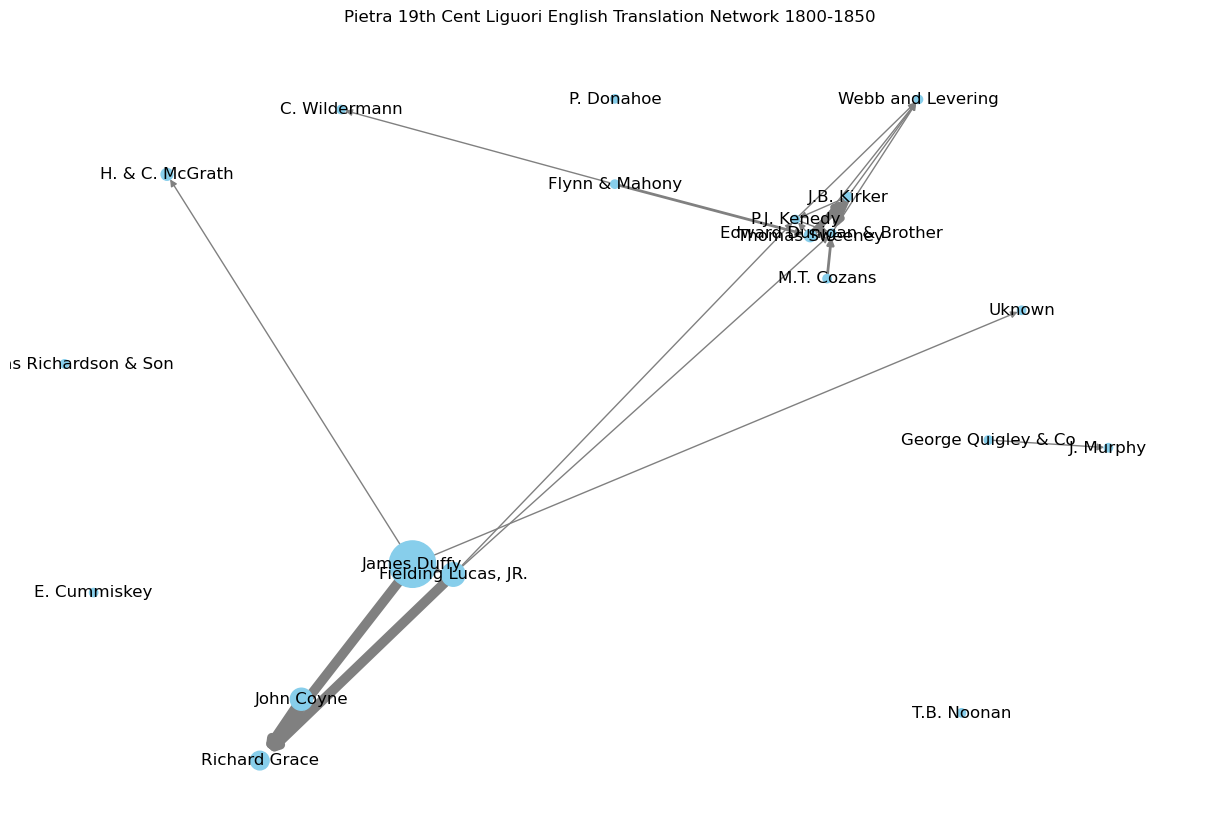

In [256]:

G_combined_thru_1850 = nx.DiGraph()

for u, v, data in G_thru_1850.edges(data=True):
    if G_combined_thru_1850.has_edge(u, v):
        # If the edge exists, update the weight attribute by adding the current edge's weight
        G_combined_thru_1850[u][v]['weight'] += data['weight']
    else:
        G_combined_thru_1850.add_edge(u, v, weight=data['weight'])

    if not G_combined_thru_1850.has_node(u):
        G_combined_thru_1850.add_node(u, magnitude=G_thru_1850.nodes[u].get('magnitude', 1))  # Default magnitude to 1 if not present
    else:
        G_combined_thru_1850.nodes[u]['magnitude'] = G_thru_1850.nodes[u].get('magnitude', 1)

    if not G_combined_thru_1850.has_node(v):
        G_combined_thru_1850.add_node(v, magnitude=G_thru_1850.nodes[v].get('magnitude', 1))  # Default magnitude to 1 if not present
    else:
        G_combined_thru_1850.nodes[v]['magnitude'] = G_thru_1850.nodes[v].get('magnitude', 1)

for u, v, data in G_combined_thru_1850.edges(data=True):
    data['weight'] = sum(data['weight'])
    
for node, data in G_thru_1850.nodes(data=True):
    if not G_combined_thru_1850.has_node(node):
        G_combined_thru_1850.add_node(node, magnitude=G_thru_1850.nodes[node].get('magnitude', 1))
    
node_sizes = [G_combined_thru_1850.nodes[node].get('magnitude', 1) for node in G_combined_thru_1850.nodes()]

# Scale node sizes for better visualization (adjust scaling factor as needed)
node_sizes = [size * 36 for size in node_sizes]

layout = nx.spring_layout(G_combined_thru_1850)

edge_widths = [data['weight'] for _, _, data in G_combined_thru_1850.edges(data=True)]

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G_combined_thru_1850, pos=layout, node_size=node_sizes, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths, edge_color='gray', arrows=True)

plt.title("Pietra 19th Cent Liguori English Translation Network 1800-1850")

plt.savefig('Pietra_Margento_19th_Cent_Liguori_EN_through_1850.png')

plt.show()


In [53]:
components_thru_50 = list(nx.strongly_connected_components(G_combined_thru_1850))

In [54]:
len(components_thru_50)

7

In [65]:
main_component = max(nx.strongly_connected_components(G_combined_thru_1850), key=len)
G_maino = G_combined_thru_1850.subgraph(main_component)

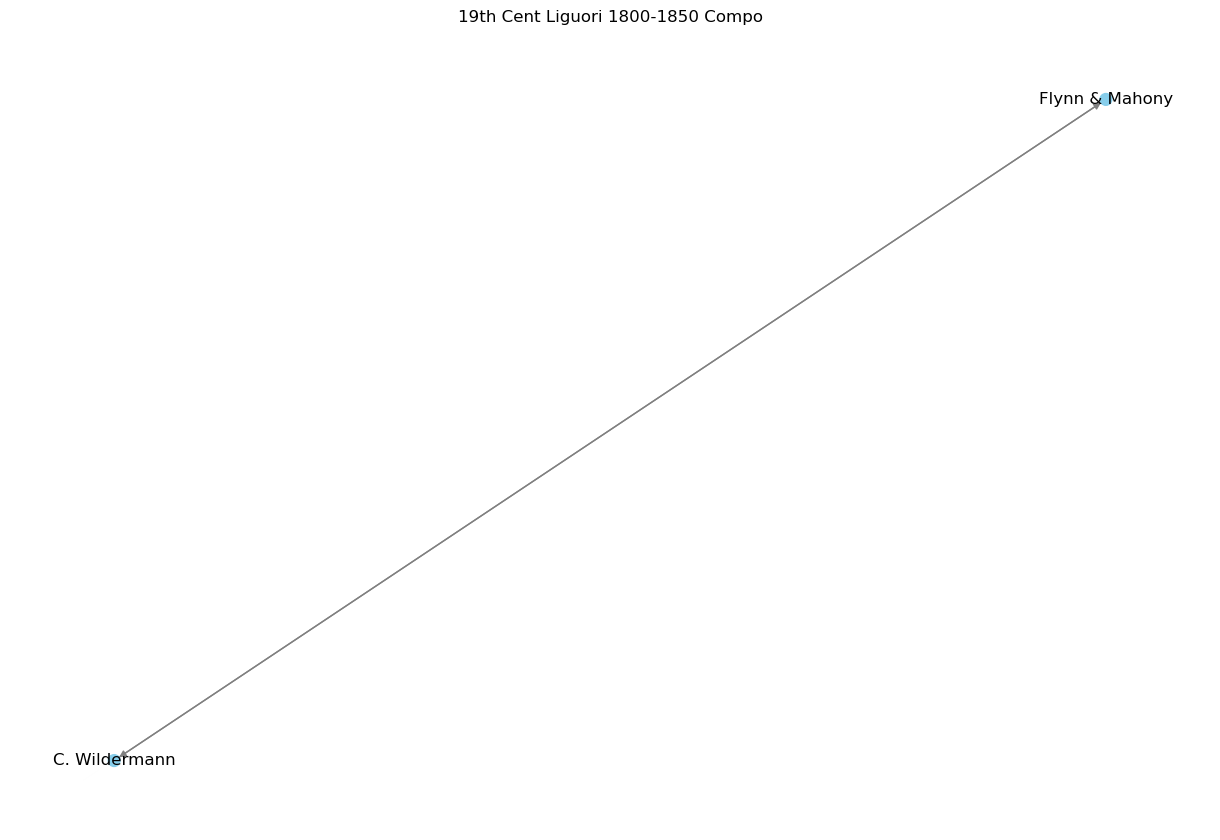

In [66]:
node_sizes = [G_maino.nodes[node].get('magnitude', 1) for node in G_maino.nodes()]

# Scale node sizes for better visualization (adjust scaling factor as needed)
node_sizes = [size * 36 for size in node_sizes]

layout = nx.spring_layout(G_maino)

edge_widths = [data['weight'] for _, _, data in G_maino.edges(data=True)]

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G_maino, pos=layout, node_size=node_sizes, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths, edge_color='gray', arrows=True)

plt.title("19th Cent Liguori 1800-1850 Compo")

# plt.savefig('Pietra_Margento_19th_Cent_Liguori_EN_through_1850.png')

plt.show()

In [257]:
l2 = list(nx.weakly_connected_components(G_combined_thru_1850))

In [258]:
len(l2)

6

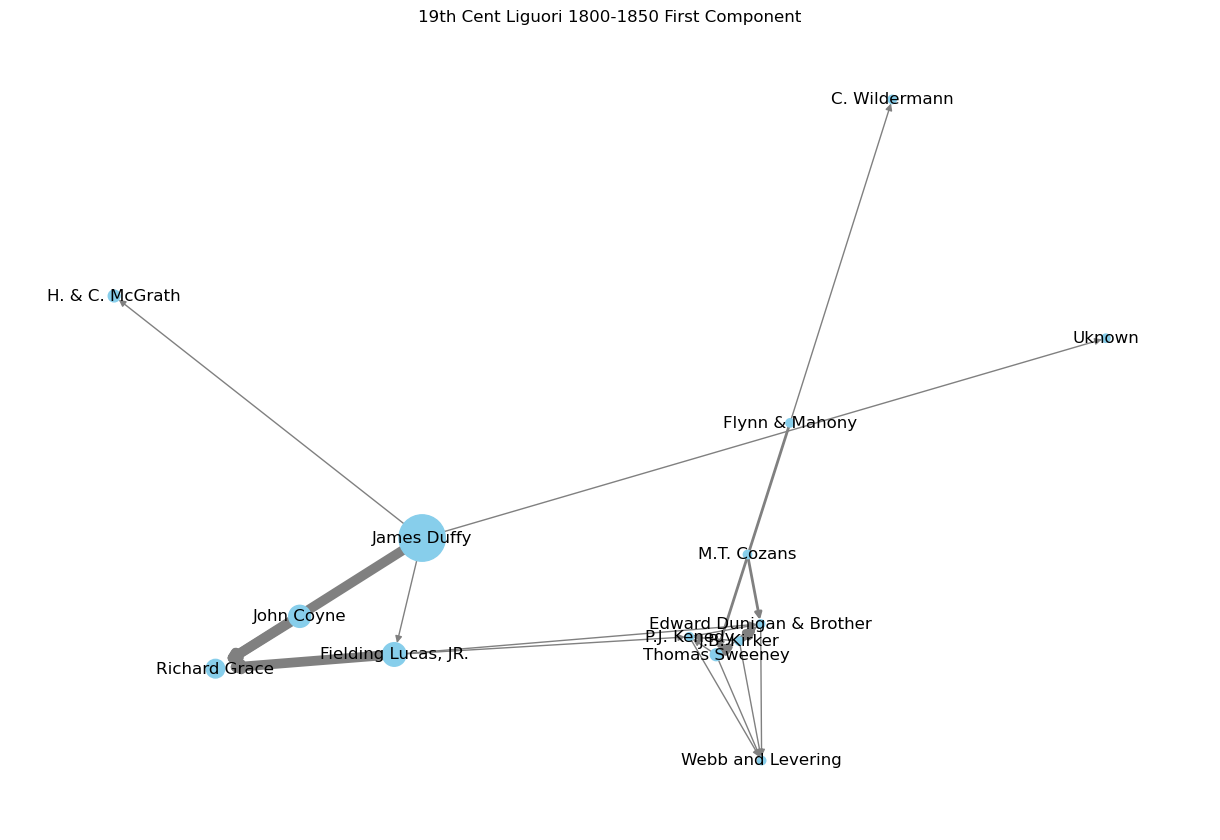

In [260]:
Go = G_combined_thru_1850.subgraph(l2[0])

node_sizes = [Go.nodes[node].get('magnitude', 1) for node in Go.nodes()]

# Scale node sizes for better visualization (adjust scaling factor as needed)
node_sizes = [size * 36 for size in node_sizes]

layout = nx.spring_layout(Go)

edge_widths = [data['weight'] for _, _, data in Go.edges(data=True)]

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(Go, pos=layout, node_size=node_sizes, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths, edge_color='gray', arrows=True)

plt.title("19th Cent Liguori 1800-1850 First Component")

plt.savefig('19th_Cent_Liguori_EN_through_1850_First_Component.png')

plt.show()

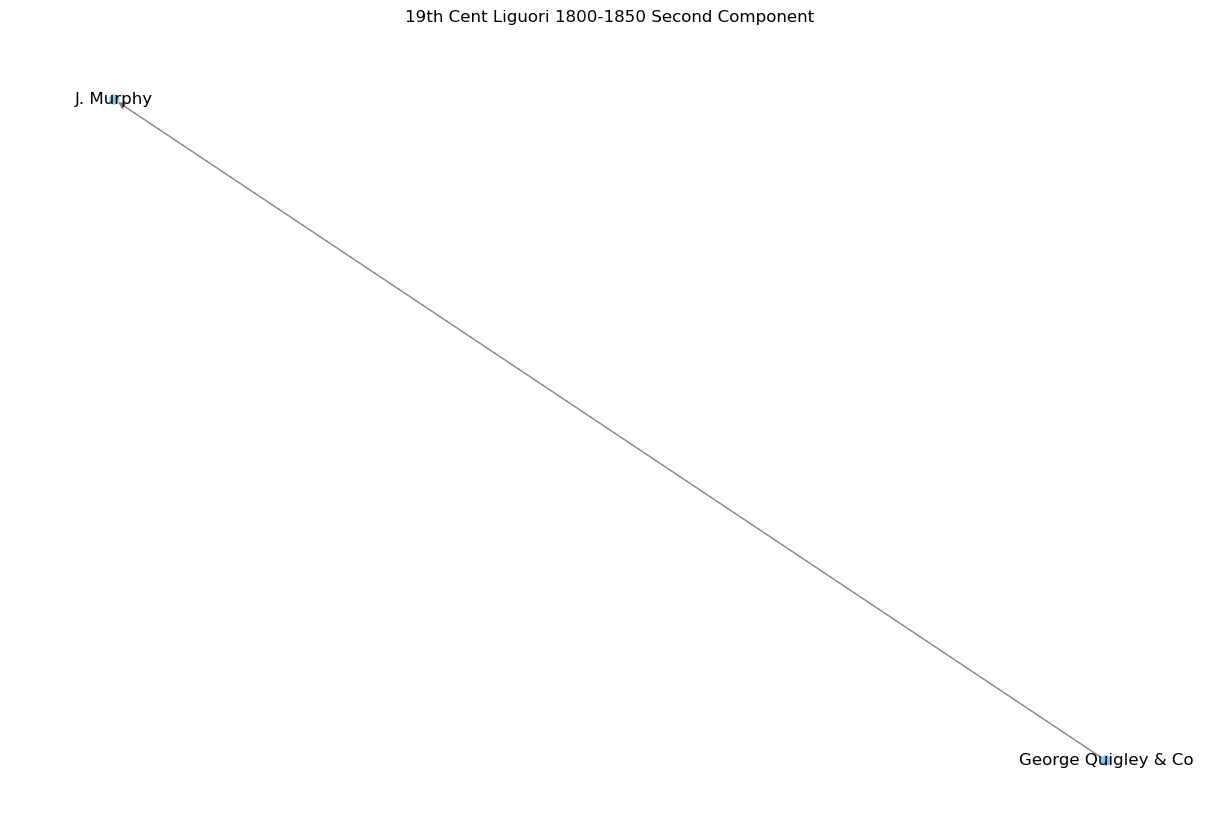

In [261]:
G0 = G_combined_thru_1850.subgraph(l2[1])

node_sizes = [G0.nodes[node].get('magnitude', 1) for node in G0.nodes()]

# Scale node sizes for better visualization (adjust scaling factor as needed)
node_sizes = [size * 44 for size in node_sizes]

layout = nx.spring_layout(G0)

edge_widths = [data['weight'] for _, _, data in G0.edges(data=True)]

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G0, pos=layout, node_size=node_sizes, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths, edge_color='gray', arrows=True)

plt.title("19th Cent Liguori 1800-1850 Second Component")

plt.savefig('19th_Cent_Liguori_EN_through_1850_Second_Component_Pietra_Margento.png')

plt.show()

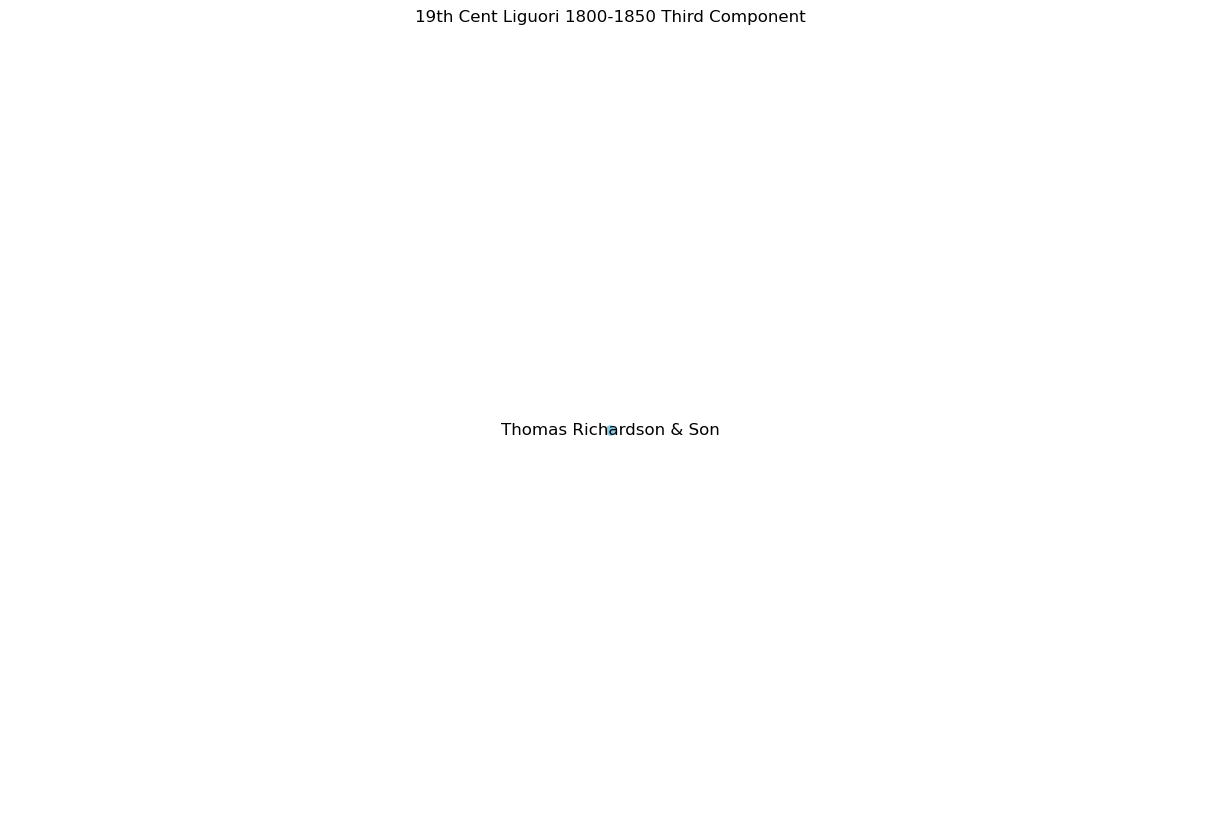

In [262]:
G0 = G_combined_thru_1850.subgraph(l2[2])

node_sizes = [G0.nodes[node].get('magnitude', 1) for node in G0.nodes()]

# Scale node sizes for better visualization (adjust scaling factor as needed)
node_sizes = [size * 44 for size in node_sizes]

layout = nx.spring_layout(G0)

edge_widths = [data['weight'] for _, _, data in G0.edges(data=True)]

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G0, pos=layout, node_size=node_sizes, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths, edge_color='gray', arrows=True)

plt.title("19th Cent Liguori 1800-1850 Third Component")

plt.savefig('19th_Cent_Liguori_EN_through_1850_Third_Component_Pietra_Margento.png')

plt.show()

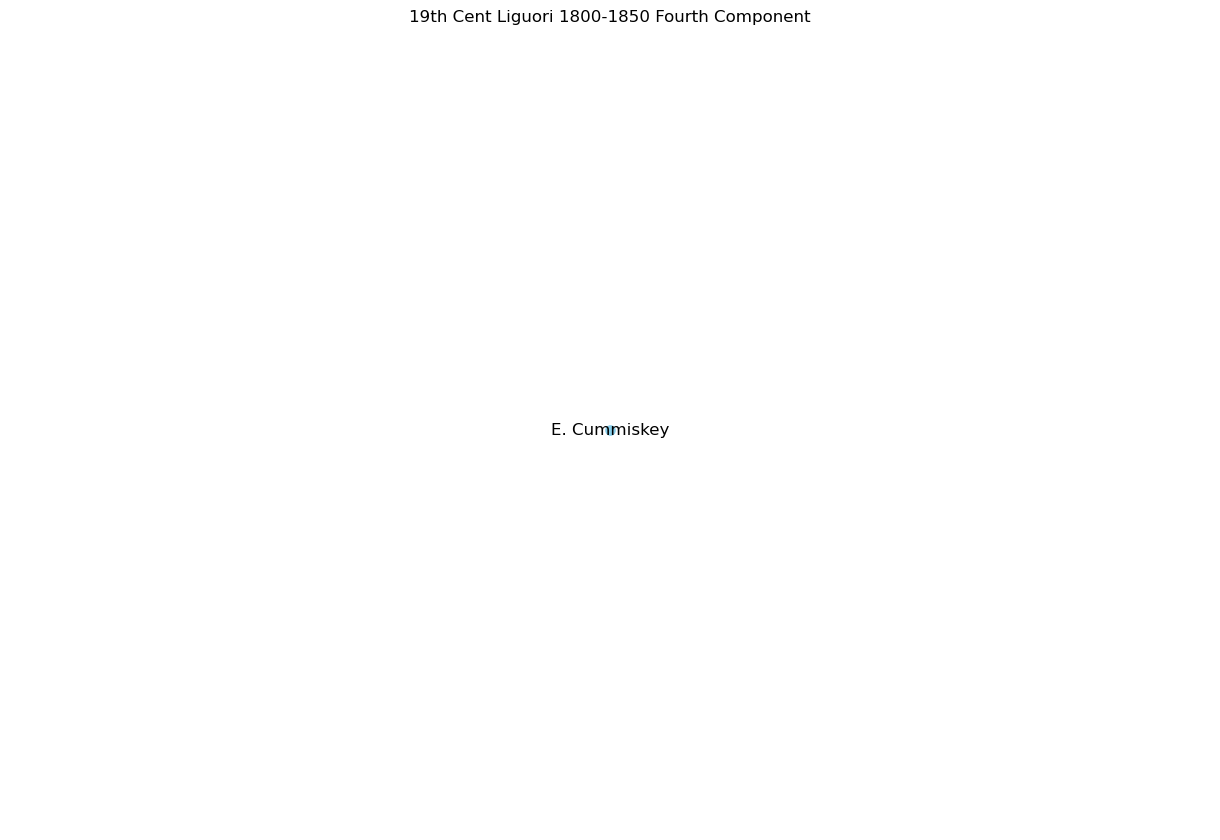

In [263]:
G0 = G_combined_thru_1850.subgraph(l2[3])

node_sizes = [G0.nodes[node].get('magnitude', 1) for node in G0.nodes()]

# Scale node sizes for better visualization (adjust scaling factor as needed)
node_sizes = [size * 44 for size in node_sizes]

layout = nx.spring_layout(G0)

edge_widths = [data['weight'] for _, _, data in G0.edges(data=True)]

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G0, pos=layout, node_size=node_sizes, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths, edge_color='gray', arrows=True)

plt.title("19th Cent Liguori 1800-1850 Fourth Component")

plt.savefig('19th_Cent_Liguori_EN_through_1850_Fourth_Component_Pietra_Margento.png')

plt.show()

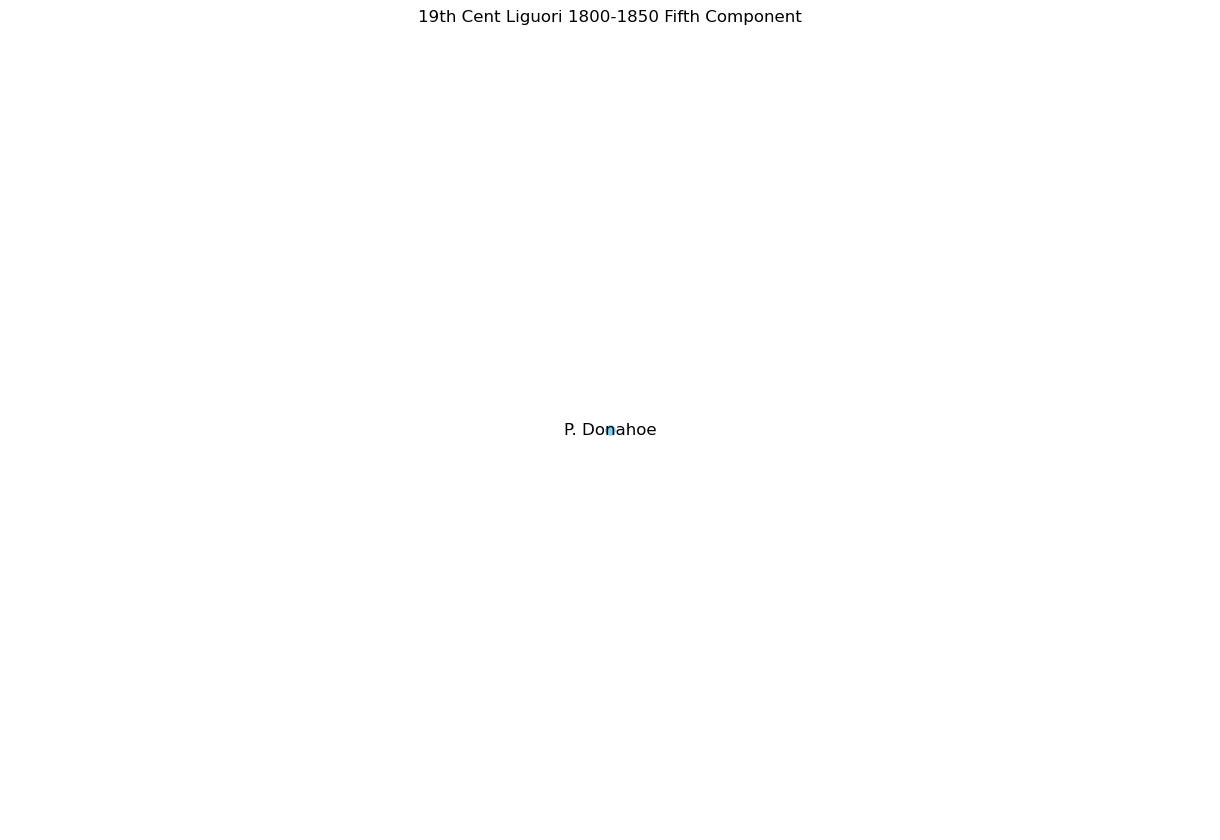

In [264]:
G0 = G_combined_thru_1850.subgraph(l2[4])

node_sizes = [G0.nodes[node].get('magnitude', 1) for node in G0.nodes()]

# Scale node sizes for better visualization (adjust scaling factor as needed)
node_sizes = [size * 44 for size in node_sizes]

layout = nx.spring_layout(G0)

edge_widths = [data['weight'] for _, _, data in G0.edges(data=True)]

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G0, pos=layout, node_size=node_sizes, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths, edge_color='gray', arrows=True)

plt.title("19th Cent Liguori 1800-1850 Fifth Component")

plt.savefig('19th_Cent_Liguori_EN_through_1850_Fifth_Component_Pietra_Margento.png')

plt.show()

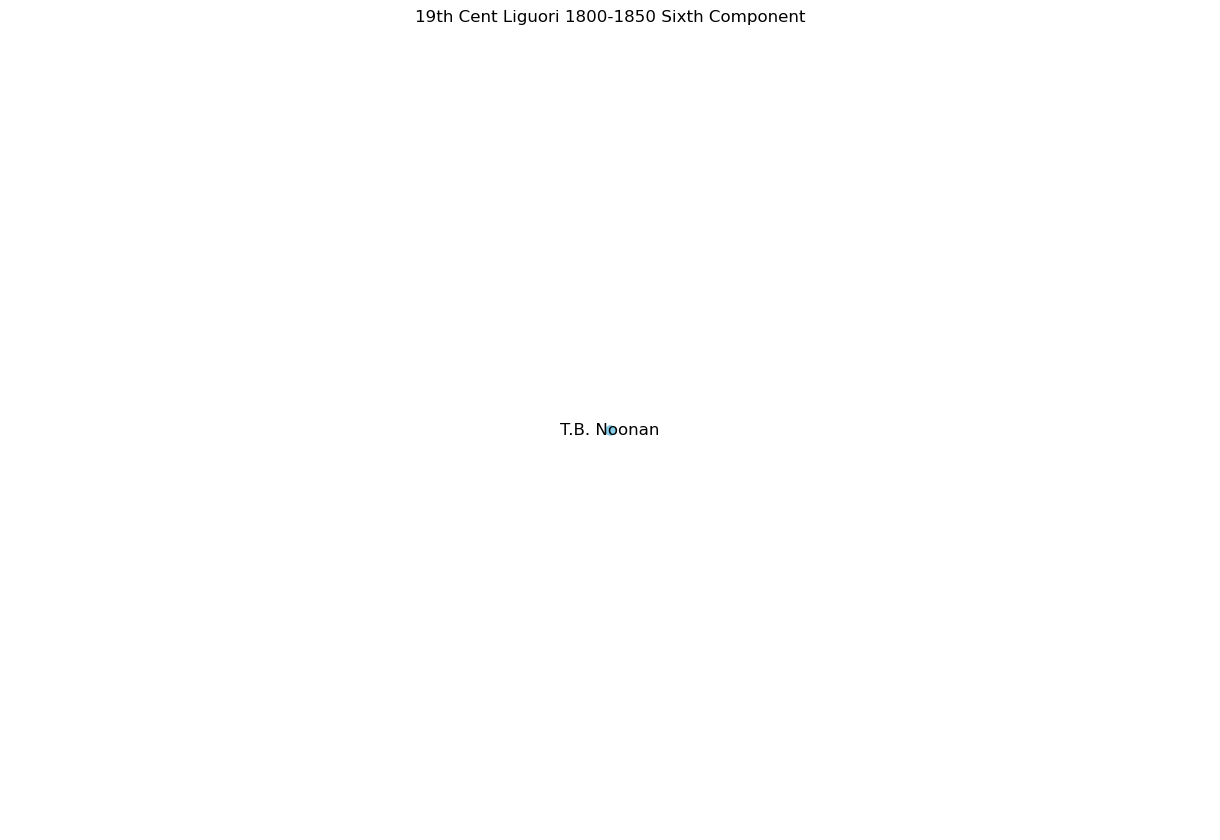

In [265]:
G0 = G_combined_thru_1850.subgraph(l2[5])

node_sizes = [G0.nodes[node].get('magnitude', 1) for node in G0.nodes()]

# Scale node sizes for better visualization (adjust scaling factor as needed)
node_sizes = [size * 44 for size in node_sizes]

layout = nx.spring_layout(G0)

edge_widths = [data['weight'] for _, _, data in G0.edges(data=True)]

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G0, pos=layout, node_size=node_sizes, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths, edge_color='gray', arrows=True)

plt.title("19th Cent Liguori 1800-1850 Sixth Component")

plt.savefig('19th_Cent_Liguori_EN_through_1850_Sixth_Component_Pietra_Margento.png')

plt.show()

In [209]:
#import pandas as pd
#import networkx as nx

excel_file = '19th_century_translations.xlsx'
df = pd.read_excel(excel_file)

G_1851_60 = nx.MultiDiGraph()

# Function to extract and sort years chronologically
def extract_years(row, cutoff_year0, cutoff_year1):
    year = row['Year']
    earlier = row['Earlier']
    subsequent = row['Subsequent Listing']
    
    # Extract and filter years based on the cutoff year
    all_years = []
    #if isinstance(year, (int, float)) and year > cutoff_year0 and year < cutoff_year1:
    if year not in ['[s.d.]', '185?', '18--', '????'] and int(year) > cutoff_year0 and int(year) < cutoff_year1:
        all_years.append(int(year))
    
    if isinstance(earlier, str) and earlier != 'nan':
        earlier_years = [int(x.split()[0]) for x in earlier.split(',') if int(x.split()[0]) < cutoff_year1 and int(x.split()[0]) > cutoff_year0]
        all_years.extend(earlier_years)
    
    if isinstance(subsequent, str) and subsequent != 'nan':
        subsequent_years = [int(x.split()[0]) for x in subsequent.split(',') if int(x.split()[0]) < cutoff_year1 and int(x.split()[0]) > cutoff_year0]
        all_years.extend(subsequent_years)
    
    all_years = sorted(all_years)
    return all_years

import pandas as pd

# Assuming df is your DataFrame

# Filter rows based on index range
filtered_df0 = df.iloc[0:179]

def is_valid_year(x):
    try:
        year_int = int(x)
        return year_int > 1850 and year_int < 1861
    except ValueError:
        return False

# Filter rows based on 'Year' column
filtered_df = filtered_df0[filtered_df0['Year'].apply(lambda x: x not in ['[s.d.]', '185?', '18--', '????'] and is_valid_year(x))]

unique_publishers = set()
for publishers in filtered_df['Publisher']:
    if isinstance(publishers, str):
        unique_publishers.update([publisher.strip() for publisher in publishers.split(';')])
    else:
        unique_publishers.update([publishers])

for publisher in unique_publishers:
    G_1851_60.add_node(publisher, publications=[])

for index, row in filtered_df.iterrows():
    title = row['Title']
    years = extract_years(row, 1850, 1861)
    editions = sum(1 for year in years)  # Calculate number of editions based on years before 1851
    publishers = [publisher.strip() for publisher in row['Publisher'].split('; ')] if isinstance(row['Publisher'], str) else [row['Publisher']]
    translator = row['Translator']
    places = [place.strip() for place in row['Place of Publication'].split('; ')] if isinstance(row['Place of Publication'], str) else [str(row['Place of Publication']).strip()]

    for publisher in unique_publishers:
        if publisher in publishers:
            G_1851_60.nodes[publisher]['publications'].append({
                'title': title,
                'years': years,
                'editions': [editions],
                'publisher': publishers,
                'translator': translator,
                'place': places
            })

for publisher in G_1851_60.nodes():
    magnitude = sum(sum(pub['editions']) for pub in G_1851_60.nodes[publisher]['publications'])
    G_1851_60.nodes[publisher]['magnitude'] = magnitude


In [213]:
def add_edges_between_publishers(G, publisher_A, publisher_B, publication_A, publication_B):
    years_A = publication_A['years']
    years_B = publication_B['years']
    translators_A = publication_A['translator']
    translators_B = publication_B['translator']
    
    if not pd.isna(translators_A) and not pd.isna(translators_B):
                same_translator = ((translators_A == translators_B) or (translators_A in translators_B) or (translators_B in translators_A))
    else:
                same_translator = False
            
    if pd.isna(translators_A) or 'not named' in translators_A or 'not mentioned' in translators_A or 'None' in translators_A:
                same_translator = False
    if pd.isna(translators_B) or 'not named' in translators_B or 'not mentioned' in translators_B or 'None' in translators_B:
                same_translator = False
    
    # Check for copublication relation
    if publication_A['publisher'] == publication_B['publisher'] and publication_A['title'] == publication_B['title'] and set(years_A) == set(years_B):
        weight = max(publication_A['editions'], publication_B['editions'])
        # Add copublication edge with a unique key based on the relation type
        edge_key = f"copub_{publisher_A}_{publisher_B}_{publication_A['title']}"
        add_edge_with_attributes(G, publisher_A, publisher_B, publication_A['title'], 
                                 years_A, years_B, translators_A, translators_B,
                                 publication_A['editions'], publication_B['editions'],
                                 publication_A['place'], publication_B['place'],
                                 weight, 'copublication', key=edge_key)

    # Check for reprint relation
    if translators_A == translators_B and publication_A['title'] == publication_B['title'] and years_A and years_B and years_A[0] < years_B[0] and publication_A['publisher'] != publication_B['publisher']:
        weight = publication_B['editions']
        # Add reprint edge with a unique key based on the relation type
        edge_key = f"reprint_{publisher_A}_{publisher_B}_{publication_A['title']}"
        add_edge_with_attributes(G, publisher_A, publisher_B, publication_A['title'], 
                                 years_A, years_B, translators_A, translators_B,
                                 publication_A['editions'], publication_B['editions'],
                                 publication_A['place'], publication_B['place'],
                                 weight, 'reprint', key=edge_key)

    # Check for retranslation relation
    if translators_A != translators_B and publication_A['title'] == publication_B['title'] and years_A and years_B and years_A[0] < years_B[0] and publication_A['publisher'] != publication_B['publisher']:
        weight = publication_B['editions']
        # Add retranslation edge with a unique key based on the relation type
        edge_key = f"retrans_{publisher_A}_{publisher_B}_{publication_A['title']}"
        add_edge_with_attributes(G, publisher_A, publisher_B, publication_A['title'], 
                                 years_A, years_B, translators_A, translators_B,
                                 publication_A['editions'], publication_B['editions'],
                                 publication_A['place'], publication_B['place'],
                                 weight, 'retranslation', key=edge_key)

# Iterate over combinations of nodes (publishers)
for publisher_A, publisher_B in itertools.combinations(G_1851_60.nodes(), 2):
    publications_A = G_1851_60.nodes[publisher_A]["publications"]
    publications_B = G_1851_60.nodes[publisher_B]["publications"]
    
    # Iterate over publications of each publisher pair
    for publication_A in publications_A:
        for publication_B in publications_B:
            # Add edges based on different relations
            add_edges_between_publishers(G_1851_60, publisher_A, publisher_B, publication_A, publication_B)


In [211]:
sorted_nodes = sorted(G_1851_60.nodes(data=True), key=lambda x: x[1].get('magnitude', 0), reverse=True)

# Print nodes in descending order of magnitude
for node, attrs in sorted_nodes:
    print(f"{node}, Magnitude: {attrs.get('magnitude', 0)}")

Edward Dunigan & Brother, Magnitude: 14
P.J. Kenedy, Magnitude: 8
James Duffy, Magnitude: 4
D. & J. Sadlier & Co., Magnitude: 3
P. O'Shea, Magnitude: 2
T.W. Strong, Magnitude: 2
J.B. Kirker, Magnitude: 2
P. J. Kenedy, Magnitude: 2
Catholic Publication Society, Magnitude: 1
Fielding Lucas, JR., Magnitude: 1
Thomas Sweeney, Magnitude: 1
M.T. Cozans, Magnitude: 1
George Quigley & Co, Magnitude: 1
J. and C. Mozley, Magnitude: 1
THE REFORMATION SOCIETY, Magnitude: 1
J.M. O'Toole, Magnitude: 1
P. Donahoe, Magnitude: 1
J. Murphy, Magnitude: 1
Webb and Levering, Magnitude: 1
D. O'Halloran, Magnitude: 1
H. & C. McGrath, Magnitude: 1


In [162]:
for node, attrs in sorted_nodes:
    print(f"{node}, {attrs}")

Edward Dunigan & Brother, {'publications': [{'title': 'The mysteries of the faith - the redemption ; containing reflections, meditations, and devotions on the Passion of our Lord Jesus Christ, and the novena of the Sacred Heart', 'years': [1855, 1857], 'editions': [2], 'publisher': ['Edward Dunigan & Brother'], 'translator': 'Rev. Robert A. Coffin', 'place': ['New York']}, {'title': 'The mysteries of the faith : the holy eucharist : containing, part I, the visits and other devotions to the most holy sacrament, preparation and thanksgiving for holy communion, etc., part II, novena of the Holy Ghost, short spiritual treatises on the love of God, uniformity to the will of God, rest for scrupulous souls, etc.', 'years': [1857], 'editions': [1], 'publisher': ['Edward Dunigan & Brother'], 'translator': 'Rev. Robert A. Coffin', 'place': ['New York']}, {'title': 'The Mission Book : A Manual', 'years': [1854, 1857], 'editions': [2], 'publisher': ['Edward Dunigan & Brother'], 'translator': 'Fath

In [163]:
for node, data in G_1851_60.nodes(data=True):
    for publication in data['publications']:
        print(f"{node}", publication['place'])

Catholic Publication Society ['New York']
Fielding Lucas, JR. [['Baltimore']]
P. O'Shea ['New York']
P. O'Shea ['New York']
James Duffy ['Dublin']
James Duffy ['Dublin']
James Duffy ['Dublin']
James Duffy ['Dublin']
T.W. Strong ['New York']
T.W. Strong ['New York']
Thomas Sweeney [['Boston']]
J.B. Kirker [['New York']]
J.B. Kirker ['New York']
P.J. Kenedy ['New York']
P.J. Kenedy ['New York']
P.J. Kenedy ['New York']
P.J. Kenedy ['New York']
P.J. Kenedy ['']
P.J. Kenedy ['New York']
P.J. Kenedy [['New York']]
P.J. Kenedy [['New York']]
M.T. Cozans [['New York']]
P. J. Kenedy ['New York']
George Quigley & Co [['Baltimore'], ['Pittsburg']]
D. & J. Sadlier & Co. ['New York', 'Montreal']
D. & J. Sadlier & Co. ['New York', 'Boston', 'Montreal']
J. and C. Mozley ['London', 'Edinburgh', 'Dublin']
Edward Dunigan & Brother ['New York']
Edward Dunigan & Brother ['New York']
Edward Dunigan & Brother [['New York']]
Edward Dunigan & Brother ['New York']
Edward Dunigan & Brother [['New York']]
Edwar

In [214]:
len(G_1851_60.edges())

15

In [215]:
out_degrees_60 = dict(G_1851_60.out_degree())
in_degrees_60 = dict(G_1851_60.in_degree())
overall_degrees_60 = {node: out_degrees_60.get(node, 0) + in_degrees_60.get(node, 0) for node in G_1851_60.nodes()}

nodes_by_out_degree_60 = sorted(out_degrees_60, key=out_degrees_60.get, reverse=True)
nodes_by_in_degree_60 = sorted(in_degrees_60, key=in_degrees_60.get, reverse=True)
nodes_by_overall_degree_60 = sorted(overall_degrees_60, key=overall_degrees_60.get, reverse=True)

print("Nodes ordered by outgoing degree:")
for node in nodes_by_out_degree_60:
    print(node, out_degrees_60[node])

print("\nNodes ordered by incoming degree:")
for node in nodes_by_in_degree_60:
    print(node, in_degrees_60[node])

print("\nNodes ordered by overall degree:")
for node in nodes_by_overall_degree_60:
    print(node, overall_degrees_60[node])

Nodes ordered by outgoing degree:
Thomas Sweeney 4
J.B. Kirker 4
Fielding Lucas, JR. 2
P.J. Kenedy 2
M.T. Cozans 1
George Quigley & Co 1
Edward Dunigan & Brother 1
Catholic Publication Society 0
P. O'Shea 0
James Duffy 0
T.W. Strong 0
P. J. Kenedy 0
D. & J. Sadlier & Co. 0
J. and C. Mozley 0
THE REFORMATION SOCIETY 0
J.M. O'Toole 0
P. Donahoe 0
J. Murphy 0
Webb and Levering 0
D. O'Halloran 0
H. & C. McGrath 0

Nodes ordered by incoming degree:
Edward Dunigan & Brother 6
Webb and Levering 4
P.J. Kenedy 3
J.B. Kirker 1
J. Murphy 1
Catholic Publication Society 0
Fielding Lucas, JR. 0
P. O'Shea 0
James Duffy 0
T.W. Strong 0
Thomas Sweeney 0
M.T. Cozans 0
P. J. Kenedy 0
George Quigley & Co 0
D. & J. Sadlier & Co. 0
J. and C. Mozley 0
THE REFORMATION SOCIETY 0
J.M. O'Toole 0
P. Donahoe 0
D. O'Halloran 0
H. & C. McGrath 0

Nodes ordered by overall degree:
Edward Dunigan & Brother 7
J.B. Kirker 5
P.J. Kenedy 5
Thomas Sweeney 4
Webb and Levering 4
Fielding Lucas, JR. 2
M.T. Cozans 1
George Quig

In [216]:

outgoing_weighted_degrees = {}
incoming_weighted_degrees = {}
overall_weighted_degrees = {}

for node in G_1851_60.nodes():
    successors = []
    for node_id in G_1851_60.successors(node):
        successors.append(node_id)
    weights = []
    for u, v, key, attr in G_1851_60.edges(keys=True, data=True):
        if (u in successors and v == node) or (u == node and v in successors):
            weight = attr['weight']
            weights.append(sum(weight))
    #outgoing_weight = sum(sum(G11.edges[node, neighbor]['weight']) for neighbor in G11.successors(node))
    outgoing_weighted_degrees[node] = sum(weights)

for node in G_1851_60.nodes():
    predecessors = []
    for node_id in G_1851_60.predecessors(node):
        predecessors.append(node_id)
    weights = []
    for u, v, key, attr in G_1851_60.edges(keys=True, data=True):
        if (u in predecessors and v == node) or (u == node and v in predecessors):
            weight = attr['weight']
            weights.append(sum(weight))
    #incoming_weight = sum(sum(G11.edges[neighbor, node]['weight']) for neighbor in G11.predecessors(node))
    incoming_weighted_degrees[node] = sum(weights)

for node in G_1851_60.nodes():
    overall_weighted_degree = outgoing_weighted_degrees.get(node, 0) + incoming_weighted_degrees.get(node, 0)
    overall_weighted_degrees[node] = overall_weighted_degree

sorted_outgoing_weighted_degrees = dict(sorted(outgoing_weighted_degrees.items(), key=lambda item: item[1], reverse=True))
sorted_incoming_weighted_degrees = dict(sorted(incoming_weighted_degrees.items(), key=lambda item: item[1], reverse=True))
sorted_overall_weighted_degrees = dict(sorted(overall_weighted_degrees.items(), key=lambda item: item[1], reverse=True))

print("Outgoing Weighted Degrees:", sorted_outgoing_weighted_degrees)
print("Incoming Weighted Degrees:", sorted_incoming_weighted_degrees)
print("Overall Weighted Degrees:", sorted_overall_weighted_degrees)


Outgoing Weighted Degrees: {'Thomas Sweeney': 4, 'J.B. Kirker': 4, 'Fielding Lucas, JR.': 2, 'P.J. Kenedy': 2, 'M.T. Cozans': 2, 'George Quigley & Co': 1, 'Edward Dunigan & Brother': 1, 'Catholic Publication Society': 0, "P. O'Shea": 0, 'James Duffy': 0, 'T.W. Strong': 0, 'P. J. Kenedy': 0, 'D. & J. Sadlier & Co.': 0, 'J. and C. Mozley': 0, 'THE REFORMATION SOCIETY': 0, "J.M. O'Toole": 0, 'P. Donahoe': 0, 'J. Murphy': 0, 'Webb and Levering': 0, "D. O'Halloran": 0, 'H. & C. McGrath': 0}
Incoming Weighted Degrees: {'Edward Dunigan & Brother': 7, 'Webb and Levering': 4, 'P.J. Kenedy': 3, 'J.B. Kirker': 1, 'J. Murphy': 1, 'Catholic Publication Society': 0, 'Fielding Lucas, JR.': 0, "P. O'Shea": 0, 'James Duffy': 0, 'T.W. Strong': 0, 'Thomas Sweeney': 0, 'M.T. Cozans': 0, 'P. J. Kenedy': 0, 'George Quigley & Co': 0, 'D. & J. Sadlier & Co.': 0, 'J. and C. Mozley': 0, 'THE REFORMATION SOCIETY': 0, "J.M. O'Toole": 0, 'P. Donahoe': 0, "D. O'Halloran": 0, 'H. & C. McGrath': 0}
Overall Weighted D

In [217]:
from collections import Counter


source_place_counter = Counter()
target_place_counter = Counter()
overall_place_counter = Counter()


for publisher_A, publisher_B, data in G_1851_60.edges(data=True):
    if isinstance(data['source_place'], list):
        source_places = data['source_place']
    else:
        source_places = [data['source_place']]
    if isinstance(data['target_place'], list):
        target_places = data['target_place']
    else:
        target_places = [data['target_place']]

    
    for i, place_list in enumerate(source_places):
        if isinstance(place_list, str):
            source_places[i] = [place_list]
    
    for i, place_list in enumerate(target_places):
        if isinstance(place_list, str):
            #place_list = [place_list]
            target_places[i] = [place_list]
            
    for place_list in source_places:
        for place in place_list:
            source_place_counter[place] += 1
            
    for place_list in target_places:
        for place in place_list:
            target_place_counter[place] += 1
    
    for place_list in source_places + target_places:
        #if isinstance(place_list, str):
            #place_list = [place_list]  # Convert string to list
        for place in place_list:
            overall_place_counter[place] += 1


sorted_source_places_60 = source_place_counter.most_common()
sorted_target_places_60 = target_place_counter.most_common()
sorted_overall_places_60 = overall_place_counter.most_common()


print("Sorted Source Places:", sorted_source_places_60)
print("Sorted Target Places:", sorted_target_places_60)
print("Sorted Overall Places:", sorted_overall_places_60)


Sorted Source Places: [('New York', 8), ('Boston', 4), ('Baltimore', 3), ('Pittsburg', 1)]
Sorted Target Places: [('New York', 10), ('Louisville', 4), ('Baltimore', 1), ('Pittsburg', 1)]
Sorted Overall Places: [('New York', 18), ('Baltimore', 4), ('Boston', 4), ('Louisville', 4), ('Pittsburg', 2)]


In [218]:
source_place_counter_weighted = Counter()
target_place_counter_weighted = Counter()
overall_place_counter_weighted = Counter()

for publisher_A, publisher_B, data in  G_1851_60.edges(data=True):
    # Get the weight of the current edge
    weight = data['weight']
    
    if isinstance(data['source_place'], list):
        source_places = data['source_place']
    else:
        source_places = [data['source_place']]
    if isinstance(data['target_place'], list):
        target_places = data['target_place']
    else:
        target_places = [data['target_place']]

    for i, place_list in enumerate(source_places):
        if isinstance(place_list, str):
            source_places[i] = [place_list]

    for i, place_list in enumerate(target_places):
        if isinstance(place_list, str):
            target_places[i] = [place_list]

    for place_list in source_places:
        for place in place_list:
            source_place_counter_weighted[place] += weight[0]

    for place_list in target_places:
        for place in place_list:
            target_place_counter_weighted[place] += weight[0]

    for place_list in source_places + target_places:
        for place in place_list:
            overall_place_counter_weighted[place] += weight[0]

sorted_source_places_weighted_60 = source_place_counter_weighted.most_common()
sorted_target_places_weighted_60 = target_place_counter_weighted.most_common()
sorted_overall_places_weighted_60 = overall_place_counter_weighted.most_common()

print("Sorted Source Places (Weighted):", sorted_source_places_weighted_60)
print("Sorted Target Places (Weighted):", sorted_target_places_weighted_60)
print("Sorted Overall Places (Weighted):", sorted_overall_places_weighted_60)


Sorted Source Places (Weighted): [('New York', 9), ('Boston', 4), ('Baltimore', 3), ('Pittsburg', 1)]
Sorted Target Places (Weighted): [('New York', 11), ('Louisville', 4), ('Baltimore', 1), ('Pittsburg', 1)]
Sorted Overall Places (Weighted): [('New York', 20), ('Baltimore', 4), ('Boston', 4), ('Louisville', 4), ('Pittsburg', 2)]


In [219]:
#from collections import Counter

# Initialize counters for unweighted and weighted titles
unweighted_title_counter = Counter()
weighted_title_counter = Counter()

# Initialize dictionaries to store concatenated source and target places for each title
title_source_places = {}
title_target_places = {}

# Iterate over edges in the graph
for publisher_A, publisher_B, data in G_1851_60.edges(data=True):
    title = data['title']
    weight = data['weight']
    
    # Increment the unweighted and weighted title counters
    unweighted_title_counter[title] += 1
    weighted_title_counter[title] += weight[0]
    
    if isinstance(data['source_place'], list):
        source_places = data['source_place']
    else:
        source_places = [data['source_place']]
    if isinstance(data['target_place'], list):
        target_places = data['target_place']
    else:
        target_places = [data['target_place']]

    for i, place_list in enumerate(source_places):
        if isinstance(place_list, str):
            source_places[i] = [place_list]

    for i, place_list in enumerate(target_places):
        if isinstance(place_list, str):
            target_places[i] = [place_list]
    
    if title not in title_source_places:
                title_source_places[title] = [] 
            
    for place_list in source_places:
        for place in place_list:
            title_source_places[title].append(place)
    
    if title not in title_target_places:
                title_target_places[title] = [] 
            
    for place_list in target_places:
        for place in place_list:          
            title_target_places[title].append(place)
            
    
sorted_unweighted_titles_60 = unweighted_title_counter.most_common()

# Sort titles based on weighted occurrences
sorted_weighted_titles_60 = weighted_title_counter.most_common()

for elem in sorted_unweighted_titles_60:
    print(f"Title and number of connections between publishers it occasioned: {elem} | Source Places: {set(title_source_places[elem[0]])} | Target Places: {set(title_target_places[elem[0]])}")

for ele in sorted_weighted_titles_60:

    print(f"Title and weighted number of connections between publishers it occasioned: {ele} | Source Places: {set(title_source_places[ele[0]])} | Target Places: {set(title_target_places[ele[0]])}")


Title and number of connections between publishers it occasioned: ('Preparation for Death', 11) | Source Places: {'New York', 'Boston'} | Target Places: {'New York', 'Louisville'}
Title and number of connections between publishers it occasioned: ('The Love of Our Lord Jesus Christ. Reduced to Practice', 2) | Source Places: {'Baltimore'} | Target Places: {'New York'}
Title and number of connections between publishers it occasioned: ('The Mission Book : A Manual', 1) | Source Places: {'New York'} | Target Places: {'New York'}
Title and number of connections between publishers it occasioned: ('Duties and advantages of the religious state; or, lesser works of St. Alphonsus, relating to the religious state', 1) | Source Places: {'Pittsburg', 'Baltimore'} | Target Places: {'Pittsburg', 'Baltimore'}
Title and weighted number of connections between publishers it occasioned: ('Preparation for Death', 11) | Source Places: {'New York', 'Boston'} | Target Places: {'New York', 'Louisville'}
Title a

In [167]:
for u, v, data in G_1851_60.edges(data=True):
    print(u, v, data['weight'])

Fielding Lucas, JR. P.J. Kenedy [1]
Fielding Lucas, JR. Edward Dunigan & Brother [1]
Thomas Sweeney J.B. Kirker [1]
Thomas Sweeney P.J. Kenedy [1]
Thomas Sweeney Edward Dunigan & Brother [1]
Thomas Sweeney Webb and Levering [1]
J.B. Kirker P.J. Kenedy [1]
J.B. Kirker Edward Dunigan & Brother [1]
J.B. Kirker Webb and Levering [1]
P.J. Kenedy Edward Dunigan & Brother [1]
P.J. Kenedy Webb and Levering [1]
M.T. Cozans Edward Dunigan & Brother [2]
George Quigley & Co J. Murphy [1]
Edward Dunigan & Brother Webb and Levering [1]


In [ ]:
for u, v, key, attr in G_1851_60.edges(keys=True, data=True):
    print()

In [232]:
len(G_combined_60.edges()) 

14

In [240]:
G_combined_60 = nx.DiGraph()

for u, v, key, attr in G_1851_60.edges(keys=True, data=True):
    if G_combined_60.has_edge(u, v):
        # If the edge exists, aggregate or process the edge attributes (e.g., summing weights)
        G_combined_60[u][v]['weight'] += attr['weight']
    else:
        # Add new edge with aggregated or selected attributes
        G_combined_60.add_edge(u, v, weight=attr['weight'])

for node, data in G_1851_60.nodes(data=True):
    if not G_combined_60.has_node(node):
        G_combined_60.add_node(node, magnitude=G_1851_60.nodes[node].get('magnitude', 1))
        
# Calculate eigenvector centrality with increased max_iter
eigenvector_centralities_1 = nx.eigenvector_centrality(G_combined_60, max_iter=1000)

for node in G_combined_60.nodes():
    centrality_value = eigenvector_centralities_1[node]
    print(f"Node {node}: Eigenvector Centrality = {centrality_value}")

Node Fielding Lucas, JR.: Eigenvector Centrality = 6.374446808400779e-10
Node P.J. Kenedy: Eigenvector Centrality = 6.15631323861729e-05
Node Edward Dunigan & Brother: Eigenvector Centrality = 0.009049687393844017
Node Thomas Sweeney: Eigenvector Centrality = 6.374446808400779e-10
Node J.B. Kirker: Eigenvector Centrality = 2.792007702079543e-07
Node Webb and Levering: Eigenvector Centrality = 0.9999590488454507
Node M.T. Cozans: Eigenvector Centrality = 6.374446808400779e-10
Node George Quigley & Co: Eigenvector Centrality = 6.374446808400779e-10
Node J. Murphy: Eigenvector Centrality = 2.792007702079543e-07
Node Catholic Publication Society: Eigenvector Centrality = 6.374446808400779e-10
Node P. O'Shea: Eigenvector Centrality = 6.374446808400779e-10
Node James Duffy: Eigenvector Centrality = 6.374446808400779e-10
Node T.W. Strong: Eigenvector Centrality = 6.374446808400779e-10
Node P. J. Kenedy: Eigenvector Centrality = 6.374446808400779e-10
Node D. & J. Sadlier & Co.: Eigenvector Cen

In [241]:
# import operator

sorted_closeness_1 = sorted(closeness_centralities_1.items(), key=operator.itemgetter(1), reverse=True)
sorted_betweenness_1 = sorted(betweenness_centralities_1.items(), key=operator.itemgetter(1), reverse=True)
sorted_eigenvector_1 = sorted(eigenvector_centralities_1.items(), key=operator.itemgetter(1), reverse=True)

In [237]:
sorted_closeness_1

[('Edward Dunigan & Brother', 0.25),
 ('Webb and Levering', 0.22499999999999998),
 ('P.J. Kenedy', 0.15),
 ('J.B. Kirker', 0.05),
 ('J. Murphy', 0.05),
 ('Fielding Lucas, JR.', 0.0),
 ('Thomas Sweeney', 0.0),
 ('M.T. Cozans', 0.0),
 ('George Quigley & Co', 0.0),
 ('Catholic Publication Society', 0.0),
 ("P. O'Shea", 0.0),
 ('James Duffy', 0.0),
 ('T.W. Strong', 0.0),
 ('P. J. Kenedy', 0.0),
 ('D. & J. Sadlier & Co.', 0.0),
 ('J. and C. Mozley', 0.0),
 ('THE REFORMATION SOCIETY', 0.0),
 ("J.M. O'Toole", 0.0),
 ('P. Donahoe', 0.0),
 ("D. O'Halloran", 0.0),
 ('H. & C. McGrath', 0.0)]

In [238]:
sorted_betweenness_1

[('Edward Dunigan & Brother', 0.003947368421052632),
 ('P.J. Kenedy', 0.0013157894736842105),
 ('Fielding Lucas, JR.', 0.0),
 ('Thomas Sweeney', 0.0),
 ('J.B. Kirker', 0.0),
 ('Webb and Levering', 0.0),
 ('M.T. Cozans', 0.0),
 ('George Quigley & Co', 0.0),
 ('J. Murphy', 0.0),
 ('Catholic Publication Society', 0.0),
 ("P. O'Shea", 0.0),
 ('James Duffy', 0.0),
 ('T.W. Strong', 0.0),
 ('P. J. Kenedy', 0.0),
 ('D. & J. Sadlier & Co.', 0.0),
 ('J. and C. Mozley', 0.0),
 ('THE REFORMATION SOCIETY', 0.0),
 ("J.M. O'Toole", 0.0),
 ('P. Donahoe', 0.0),
 ("D. O'Halloran", 0.0),
 ('H. & C. McGrath', 0.0)]

In [242]:
sorted_eigenvector_1 

[('Webb and Levering', 0.9999590488454507),
 ('Edward Dunigan & Brother', 0.009049687393844017),
 ('P.J. Kenedy', 6.15631323861729e-05),
 ('J.B. Kirker', 2.792007702079543e-07),
 ('J. Murphy', 2.792007702079543e-07),
 ('Fielding Lucas, JR.', 6.374446808400779e-10),
 ('Thomas Sweeney', 6.374446808400779e-10),
 ('M.T. Cozans', 6.374446808400779e-10),
 ('George Quigley & Co', 6.374446808400779e-10),
 ('Catholic Publication Society', 6.374446808400779e-10),
 ("P. O'Shea", 6.374446808400779e-10),
 ('James Duffy', 6.374446808400779e-10),
 ('T.W. Strong', 6.374446808400779e-10),
 ('P. J. Kenedy', 6.374446808400779e-10),
 ('D. & J. Sadlier & Co.', 6.374446808400779e-10),
 ('J. and C. Mozley', 6.374446808400779e-10),
 ('THE REFORMATION SOCIETY', 6.374446808400779e-10),
 ("J.M. O'Toole", 6.374446808400779e-10),
 ('P. Donahoe', 6.374446808400779e-10),
 ("D. O'Halloran", 6.374446808400779e-10),
 ('H. & C. McGrath', 6.374446808400779e-10)]

In [249]:
for u, v, data in G_combined_60.edges(data=True):
    data['weight'] = sum(data['weight'])

# SO ONCE AGAIN, FOR EIGENVECTOR WE NEED TO INCREASE ITERATIONS TO 500
weighted_closeness_1 = nx.closeness_centrality(G_combined_60, distance='weight')
weighted_betweenness_1 = nx.betweenness_centrality(G_combined_60, weight='weight')
weighted_eigenvector_1 = nx.eigenvector_centrality(G_combined_60, max_iter = 500, weight='weight')

sorted_weighted_closeness_1 = sorted(weighted_closeness_1.items(), key=lambda x: x[1], reverse=True)
sorted_weighted_betweenness_1 = sorted(weighted_betweenness_1.items(), key=lambda x: x[1], reverse=True)
sorted_weighted_eigenvector_1 = sorted(weighted_eigenvector_1.items(), key=lambda x: x[1], reverse=True)

In [47]:
weighted_closeness_1

{'Edward Dunigan & Brother': 0.23076923076923078,
 'J.B. Kirker': 0.17307692307692307,
 'P.J. Kenedy': 0.3076923076923077,
 'Webb and Levering': 0.32051282051282054,
 "P. O'Shea": 0.17582417582417584,
 'Thomas Sweeney': 0.0,
 'J. Murphy': 0.07692307692307693,
 'George Quigley & Co': 0.07692307692307693,
 'Fielding Lucas, JR.': 0.0,
 'James Duffy': 0.0,
 "J.M. O'Toole": 0.0,
 'T.W. Strong': 0.0,
 'P. J. Kenedy': 0.0,
 'H. & C. McGrath': 0.0}

In [251]:
sorted_weighted_closeness_1 # UPDATED FINAL

[('Webb and Levering', 0.19999999999999998),
 ('Edward Dunigan & Brother', 0.17857142857142858),
 ('P.J. Kenedy', 0.15),
 ('J. Murphy', 0.05),
 ('J.B. Kirker', 0.016666666666666666),
 ('Fielding Lucas, JR.', 0.0),
 ('Thomas Sweeney', 0.0),
 ('M.T. Cozans', 0.0),
 ('George Quigley & Co', 0.0),
 ('Catholic Publication Society', 0.0),
 ("P. O'Shea", 0.0),
 ('James Duffy', 0.0),
 ('T.W. Strong', 0.0),
 ('P. J. Kenedy', 0.0),
 ('D. & J. Sadlier & Co.', 0.0),
 ('J. and C. Mozley', 0.0),
 ('THE REFORMATION SOCIETY', 0.0),
 ("J.M. O'Toole", 0.0),
 ('P. Donahoe', 0.0),
 ("D. O'Halloran", 0.0),
 ('H. & C. McGrath', 0.0)]

In [252]:
sorted_weighted_betweenness_1

[('P.J. Kenedy', 0.003947368421052632),
 ('Edward Dunigan & Brother', 0.003947368421052632),
 ('Fielding Lucas, JR.', 0.0),
 ('Thomas Sweeney', 0.0),
 ('J.B. Kirker', 0.0),
 ('Webb and Levering', 0.0),
 ('M.T. Cozans', 0.0),
 ('George Quigley & Co', 0.0),
 ('J. Murphy', 0.0),
 ('Catholic Publication Society', 0.0),
 ("P. O'Shea", 0.0),
 ('James Duffy', 0.0),
 ('T.W. Strong', 0.0),
 ('P. J. Kenedy', 0.0),
 ('D. & J. Sadlier & Co.', 0.0),
 ('J. and C. Mozley', 0.0),
 ('THE REFORMATION SOCIETY', 0.0),
 ("J.M. O'Toole", 0.0),
 ('P. Donahoe', 0.0),
 ("D. O'Halloran", 0.0),
 ('H. & C. McGrath', 0.0)]

In [253]:
sorted_weighted_eigenvector_1

[('Webb and Levering', 0.9999590331467568),
 ('Edward Dunigan & Brother', 0.009051425549111924),
 ('P.J. Kenedy', 6.102168365355018e-05),
 ('J.B. Kirker', 2.7884939205690463e-07),
 ('J. Murphy', 9.309148911655825e-08),
 ('Fielding Lucas, JR.', 2.125376463848359e-10),
 ('Thomas Sweeney', 2.125376463848359e-10),
 ('M.T. Cozans', 2.125376463848359e-10),
 ('George Quigley & Co', 2.125376463848359e-10),
 ('Catholic Publication Society', 2.125376463848359e-10),
 ("P. O'Shea", 2.125376463848359e-10),
 ('James Duffy', 2.125376463848359e-10),
 ('T.W. Strong', 2.125376463848359e-10),
 ('P. J. Kenedy', 2.125376463848359e-10),
 ('D. & J. Sadlier & Co.', 2.125376463848359e-10),
 ('J. and C. Mozley', 2.125376463848359e-10),
 ('THE REFORMATION SOCIETY', 2.125376463848359e-10),
 ("J.M. O'Toole", 2.125376463848359e-10),
 ('P. Donahoe', 2.125376463848359e-10),
 ("D. O'Halloran", 2.125376463848359e-10),
 ('H. & C. McGrath', 2.125376463848359e-10)]

In [50]:
sorted_weighted_eigenvector_1 == sorted_eigenvector_1

True

In [51]:
sorted_weighted_betweenness_1 == sorted_betweenness_1

True

In [52]:
sorted_weighted_closeness_1 == sorted_closeness_1

True

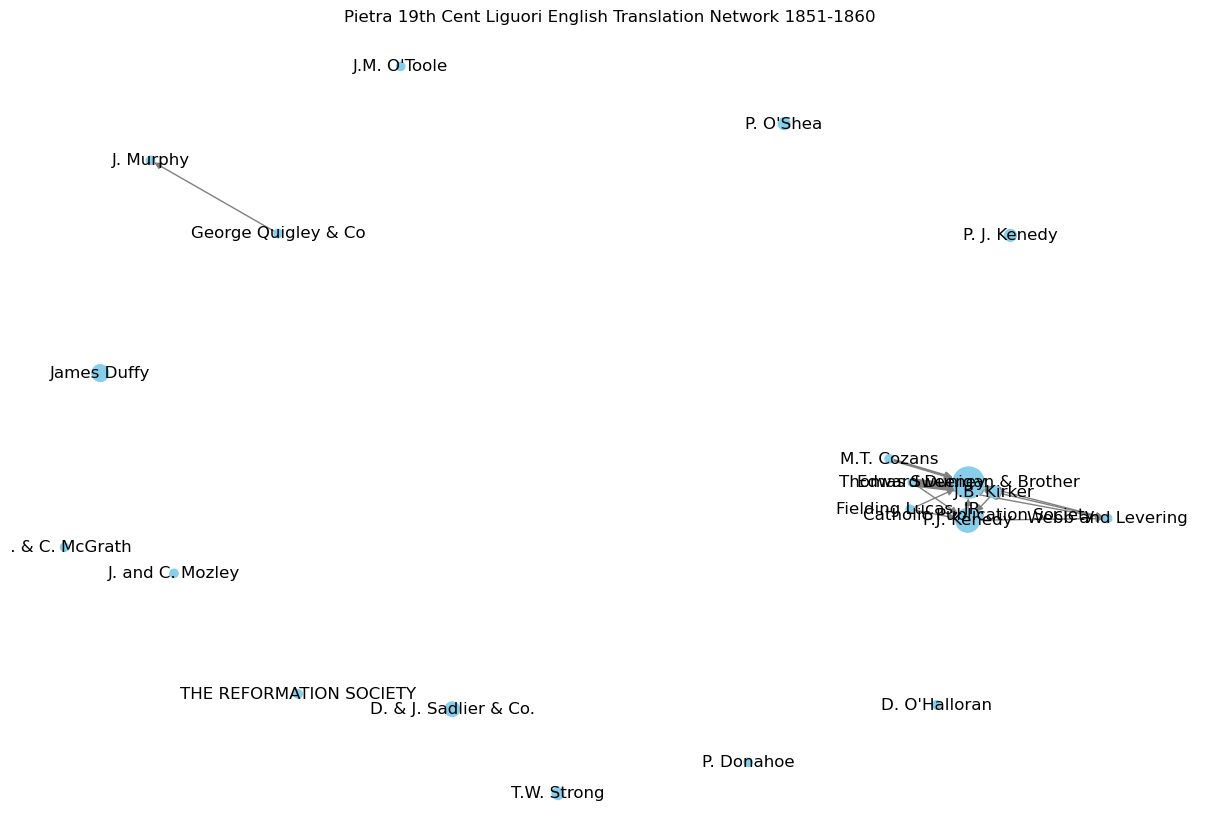

In [266]:

G_combined_60 = nx.DiGraph()

for u, v, data in G_1851_60.edges(data=True):
    if G_combined_60.has_edge(u, v):
        # If the edge exists, update the weight attribute by adding the current edge's weight
        G_combined_60[u][v]['weight'] += data['weight']
    else:
        G_combined_60.add_edge(u, v, weight=data['weight'])

    if not G_combined_60.has_node(u):
        G_combined_60.add_node(u, magnitude=G_1851_60.nodes[u].get('magnitude', 1))  # Default magnitude to 1 if not present
    else:
        G_combined_60.nodes[u]['magnitude'] = G_1851_60.nodes[u].get('magnitude', 1)

    if not G_combined_60.has_node(v):
        G_combined_60.add_node(v, magnitude=G_1851_60.nodes[v].get('magnitude', 1))  # Default magnitude to 1 if not present
    else:
        G_combined_60.nodes[v]['magnitude'] = G_1851_60.nodes[v].get('magnitude', 1)

for u, v, data in G_combined_60.edges(data=True):
    data['weight'] = sum(data['weight'])
    
for node, data in G_1851_60.nodes(data=True):
    if not G_combined_60.has_node(node):
        G_combined_60.add_node(node, magnitude=G_1851_60.nodes[node].get('magnitude', 1))
    
node_sizes = [G_combined_60.nodes[node].get('magnitude', 1) for node in G_combined_60.nodes()]

# Scale node sizes for better visualization (adjust scaling factor as needed)
node_sizes = [size * 36 for size in node_sizes]

layout = nx.spring_layout(G_combined_60)

edge_widths = [data['weight'] for _, _, data in G_combined_60.edges(data=True)]

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G_combined_60, pos=layout, node_size=node_sizes, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths, edge_color='gray', arrows=True)

plt.title("Pietra 19th Cent Liguori English Translation Network 1851-1860")

plt.savefig('Pietra_Margento_19th_Cent_Liguori_EN_1851-1860.png')

plt.show()


In [267]:
l1 = list(nx.weakly_connected_components(G_combined_60))

In [268]:
len(l1)

14

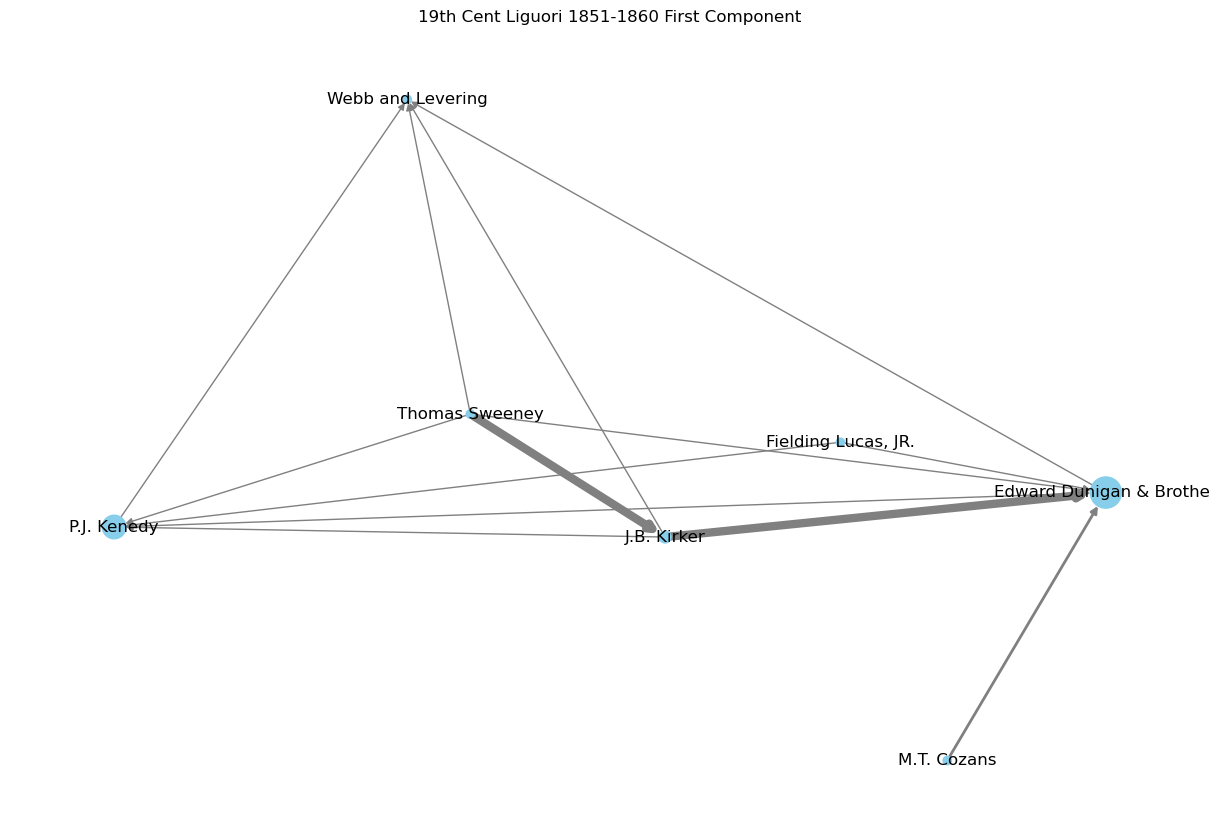

In [269]:
Go = G_combined_60.subgraph(l1[0])

node_sizes = [Go.nodes[node].get('magnitude', 1) for node in Go.nodes()]

# Scale node sizes for better visualization (adjust scaling factor as needed)
node_sizes = [size * 36 for size in node_sizes]

layout = nx.spring_layout(Go)

edge_widths = [data['weight'] for _, _, data in Go.edges(data=True)]

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(Go, pos=layout, node_size=node_sizes, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths, edge_color='gray', arrows=True)

plt.title("19th Cent Liguori 1851-1860 First Component")

plt.savefig('19th_Cent_Liguori_EN_185_First_Component.png')

plt.show()

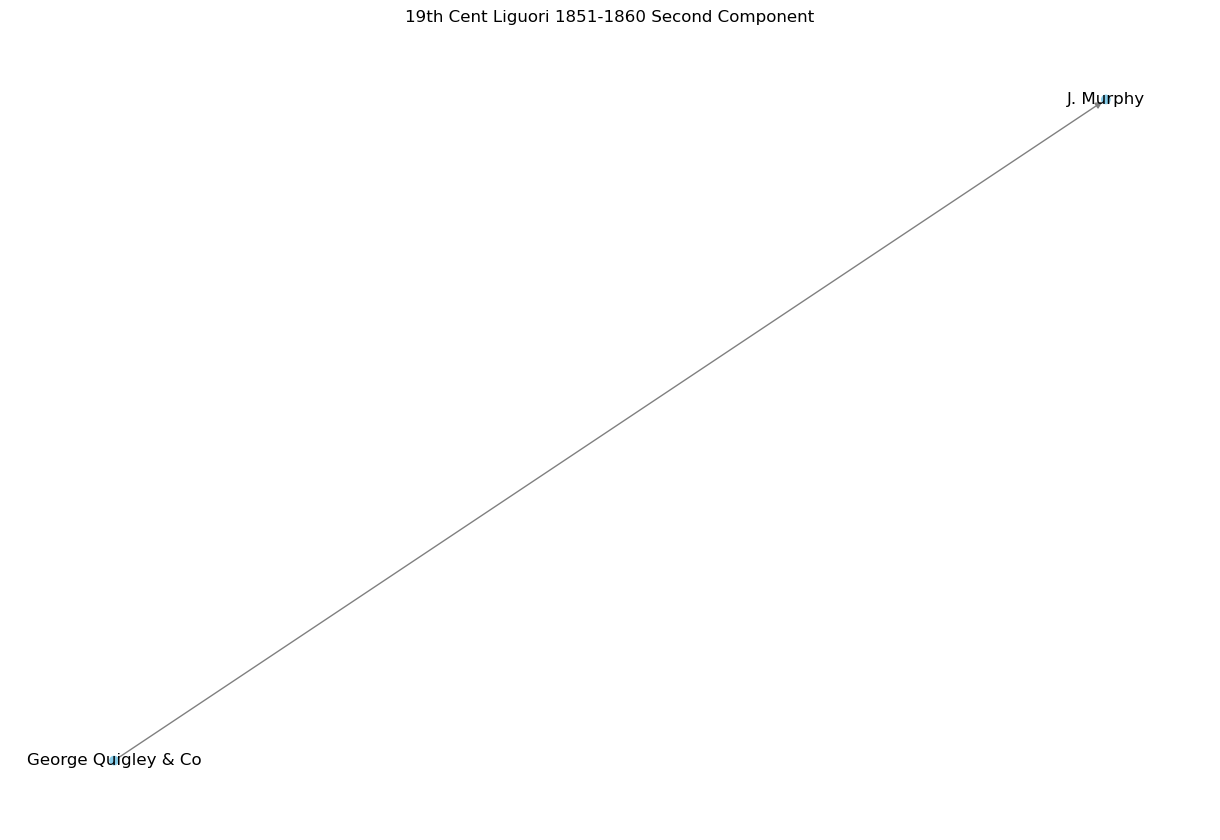

In [270]:
Go = G_combined_60.subgraph(l1[1])

node_sizes = [Go.nodes[node].get('magnitude', 1) for node in Go.nodes()]

# Scale node sizes for better visualization (adjust scaling factor as needed)
node_sizes = [size * 36 for size in node_sizes]

layout = nx.spring_layout(Go)

edge_widths = [data['weight'] for _, _, data in Go.edges(data=True)]

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(Go, pos=layout, node_size=node_sizes, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths, edge_color='gray', arrows=True)

plt.title("19th Cent Liguori 1851-1860 Second Component")

plt.savefig('19th_Cent_Liguori_EN_1851-1860_Second_Component.png')

plt.show()